# Codes for figures reproduction of *Comparative assessment of co-folding methods for molecular glue ternary structure prediction*

## MG-PDB properties distributions

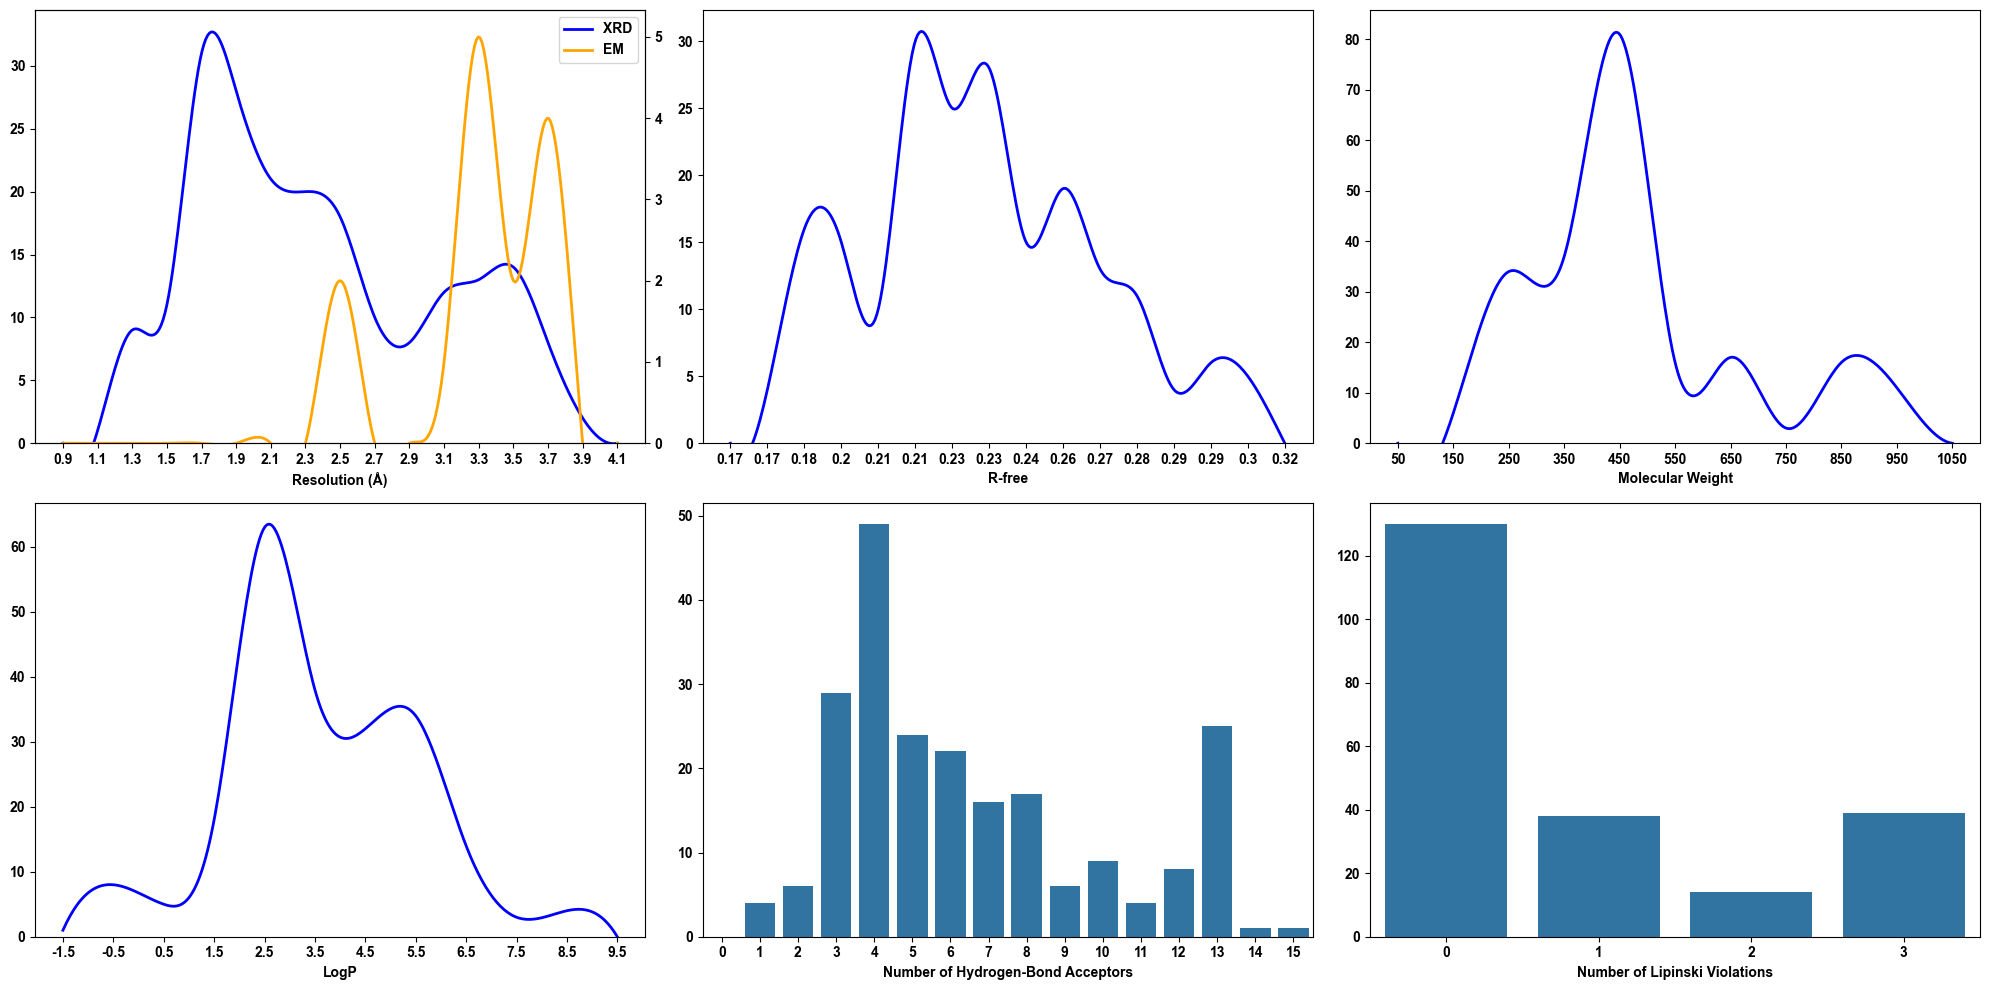

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
from pathlib import Path

df = pd.read_excel('/data02/liaoyy/MG_ternary_benchmark/1_MG_ternary_benchmark_with_release.xlsx')

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
((ax1, ax2, ax3), (ax4, ax5, ax6)) = axes

def get_midpoints(bins):
    midpoints = []
    for i in range(len(bins)-1):
        if bins[i+1] == np.inf:
            midpoints.append(f"{int(bins[i])}+")
        else:
            mid = (bins[i] + bins[i+1])/2
            if mid.is_integer():
                midpoints.append(int(mid))
            else:
                midpoints.append(round(mid, 2))
    return midpoints

def plot_smooth_curve(ax, bin_counts, color, xlabel, bins, label=None, ylabel=None):
    numeric_labels = get_midpoints(bins)
    x = np.arange(len(bin_counts))
    y = bin_counts.values
    xnew = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(xnew)
    ax.plot(xnew, y_smooth, color=color, linewidth=2, label=label)
    ax.set_xticks(x)
    ax.set_xticklabels(numeric_labels)
    ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=0)

# Resolution plot
resolution_bins = [0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2]
all_bins = pd.IntervalIndex.from_breaks(resolution_bins, closed='left')

df_res_xray = df[df['experimental_method'] == 'X-RAY DIFFRACTION'].dropna(subset=['resolution']).copy()
df_res_xray['bin'] = pd.cut(df_res_xray['resolution'], bins=resolution_bins, right=False)
bin_counts_xray = df_res_xray['bin'].value_counts().reindex(all_bins).fillna(0).astype(int).sort_index()

df_res_em = df[df['experimental_method'] == 'ELECTRON MICROSCOPY'].dropna(subset=['resolution']).copy()
df_res_em['bin'] = pd.cut(df_res_em['resolution'], bins=resolution_bins, right=False)
bin_counts_em = df_res_em['bin'].value_counts().reindex(all_bins).fillna(0).astype(int).sort_index()

ax1_em = ax1.twinx()
plot_smooth_curve(ax1, bin_counts_xray, 'blue', 'Resolution (Å)', resolution_bins, label="XRD")
plot_smooth_curve(ax1_em, bin_counts_em, 'orange', 'Resolution (Å)', resolution_bins, label="EM")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_em.get_legend_handles_labels()
ax1_em.legend(lines1 + lines2, labels1 + labels2)

# R-free plot
rfree_bins = [0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32]
df_rfree = df.dropna(subset=['ls_rfactor_rfree']).copy()
df_rfree['bin'] = pd.cut(df_rfree['ls_rfactor_rfree'], bins=rfree_bins, right=False)
bin_counts = df_rfree['bin'].value_counts().sort_index()
plot_smooth_curve(ax2, bin_counts, 'blue', 'R-free', rfree_bins)

# MolecularWeight plot
mw_bins = list(range(0, 1200, 100)) 
df_mw = df.dropna(subset=['MolecularWeight']).copy()
df_mw['bin'] = pd.cut(df_mw['MolecularWeight'], bins=mw_bins, right=False)
bin_counts = df_mw['bin'].value_counts().sort_index()
plot_smooth_curve(ax3, bin_counts, 'blue', 'Molecular Weight', mw_bins)

# LogP plot
logp_bins = [-2,-1,0,1,2,3,4,5,6,7,8,9,10]
df_logp = df.dropna(subset=['LogP']).copy()
df_logp['bin'] = pd.cut(df_logp['LogP'], bins=logp_bins, right=False)
bin_counts = df_logp['bin'].value_counts().sort_index()
plot_smooth_curve(ax4, bin_counts, 'blue', 'LogP', logp_bins)

# hbond_acceptors barplot
df_hba = df.dropna(subset=['hbond_acceptors']).copy()
max_hba = int(df_hba['hbond_acceptors'].max())
bins = list(range(0, max_hba + 2))
labels = [str(i) for i in range(0, max_hba + 1)]
df_hba['bin'] = pd.cut(df_hba['hbond_acceptors'], bins=bins, right=False, labels=labels)
bin_counts = df_hba['bin'].value_counts().sort_index()
sns.barplot(x=bin_counts.index, y=bin_counts.values, ax=ax5)
ax5.set_xlabel('Number of Hydrogen-Bond Acceptors')

# lipinski_violations barplot
df_lv = df.dropna(subset=['lipinski_violations']).copy()
max_lv = int(df_lv['lipinski_violations'].max())
bins = list(range(0, max_lv + 2))
labels = [str(i) for i in range(0, max_lv + 1)]
df_lv['bin'] = pd.cut(df_lv['lipinski_violations'], bins=bins, right=False, labels=labels)
bin_counts = df_lv['bin'].value_counts().sort_index()
sns.barplot(x=bin_counts.index, y=bin_counts.values, ax=ax6)
ax6.set_xlabel('Number of Lipinski Violations')

plt.tight_layout()
plt.show()

## MG-PDB BSA distributions & effector distributions

(-1.099999290261603,
 1.0999999662021642,
 -1.0999999968406318,
 1.099999999849554)

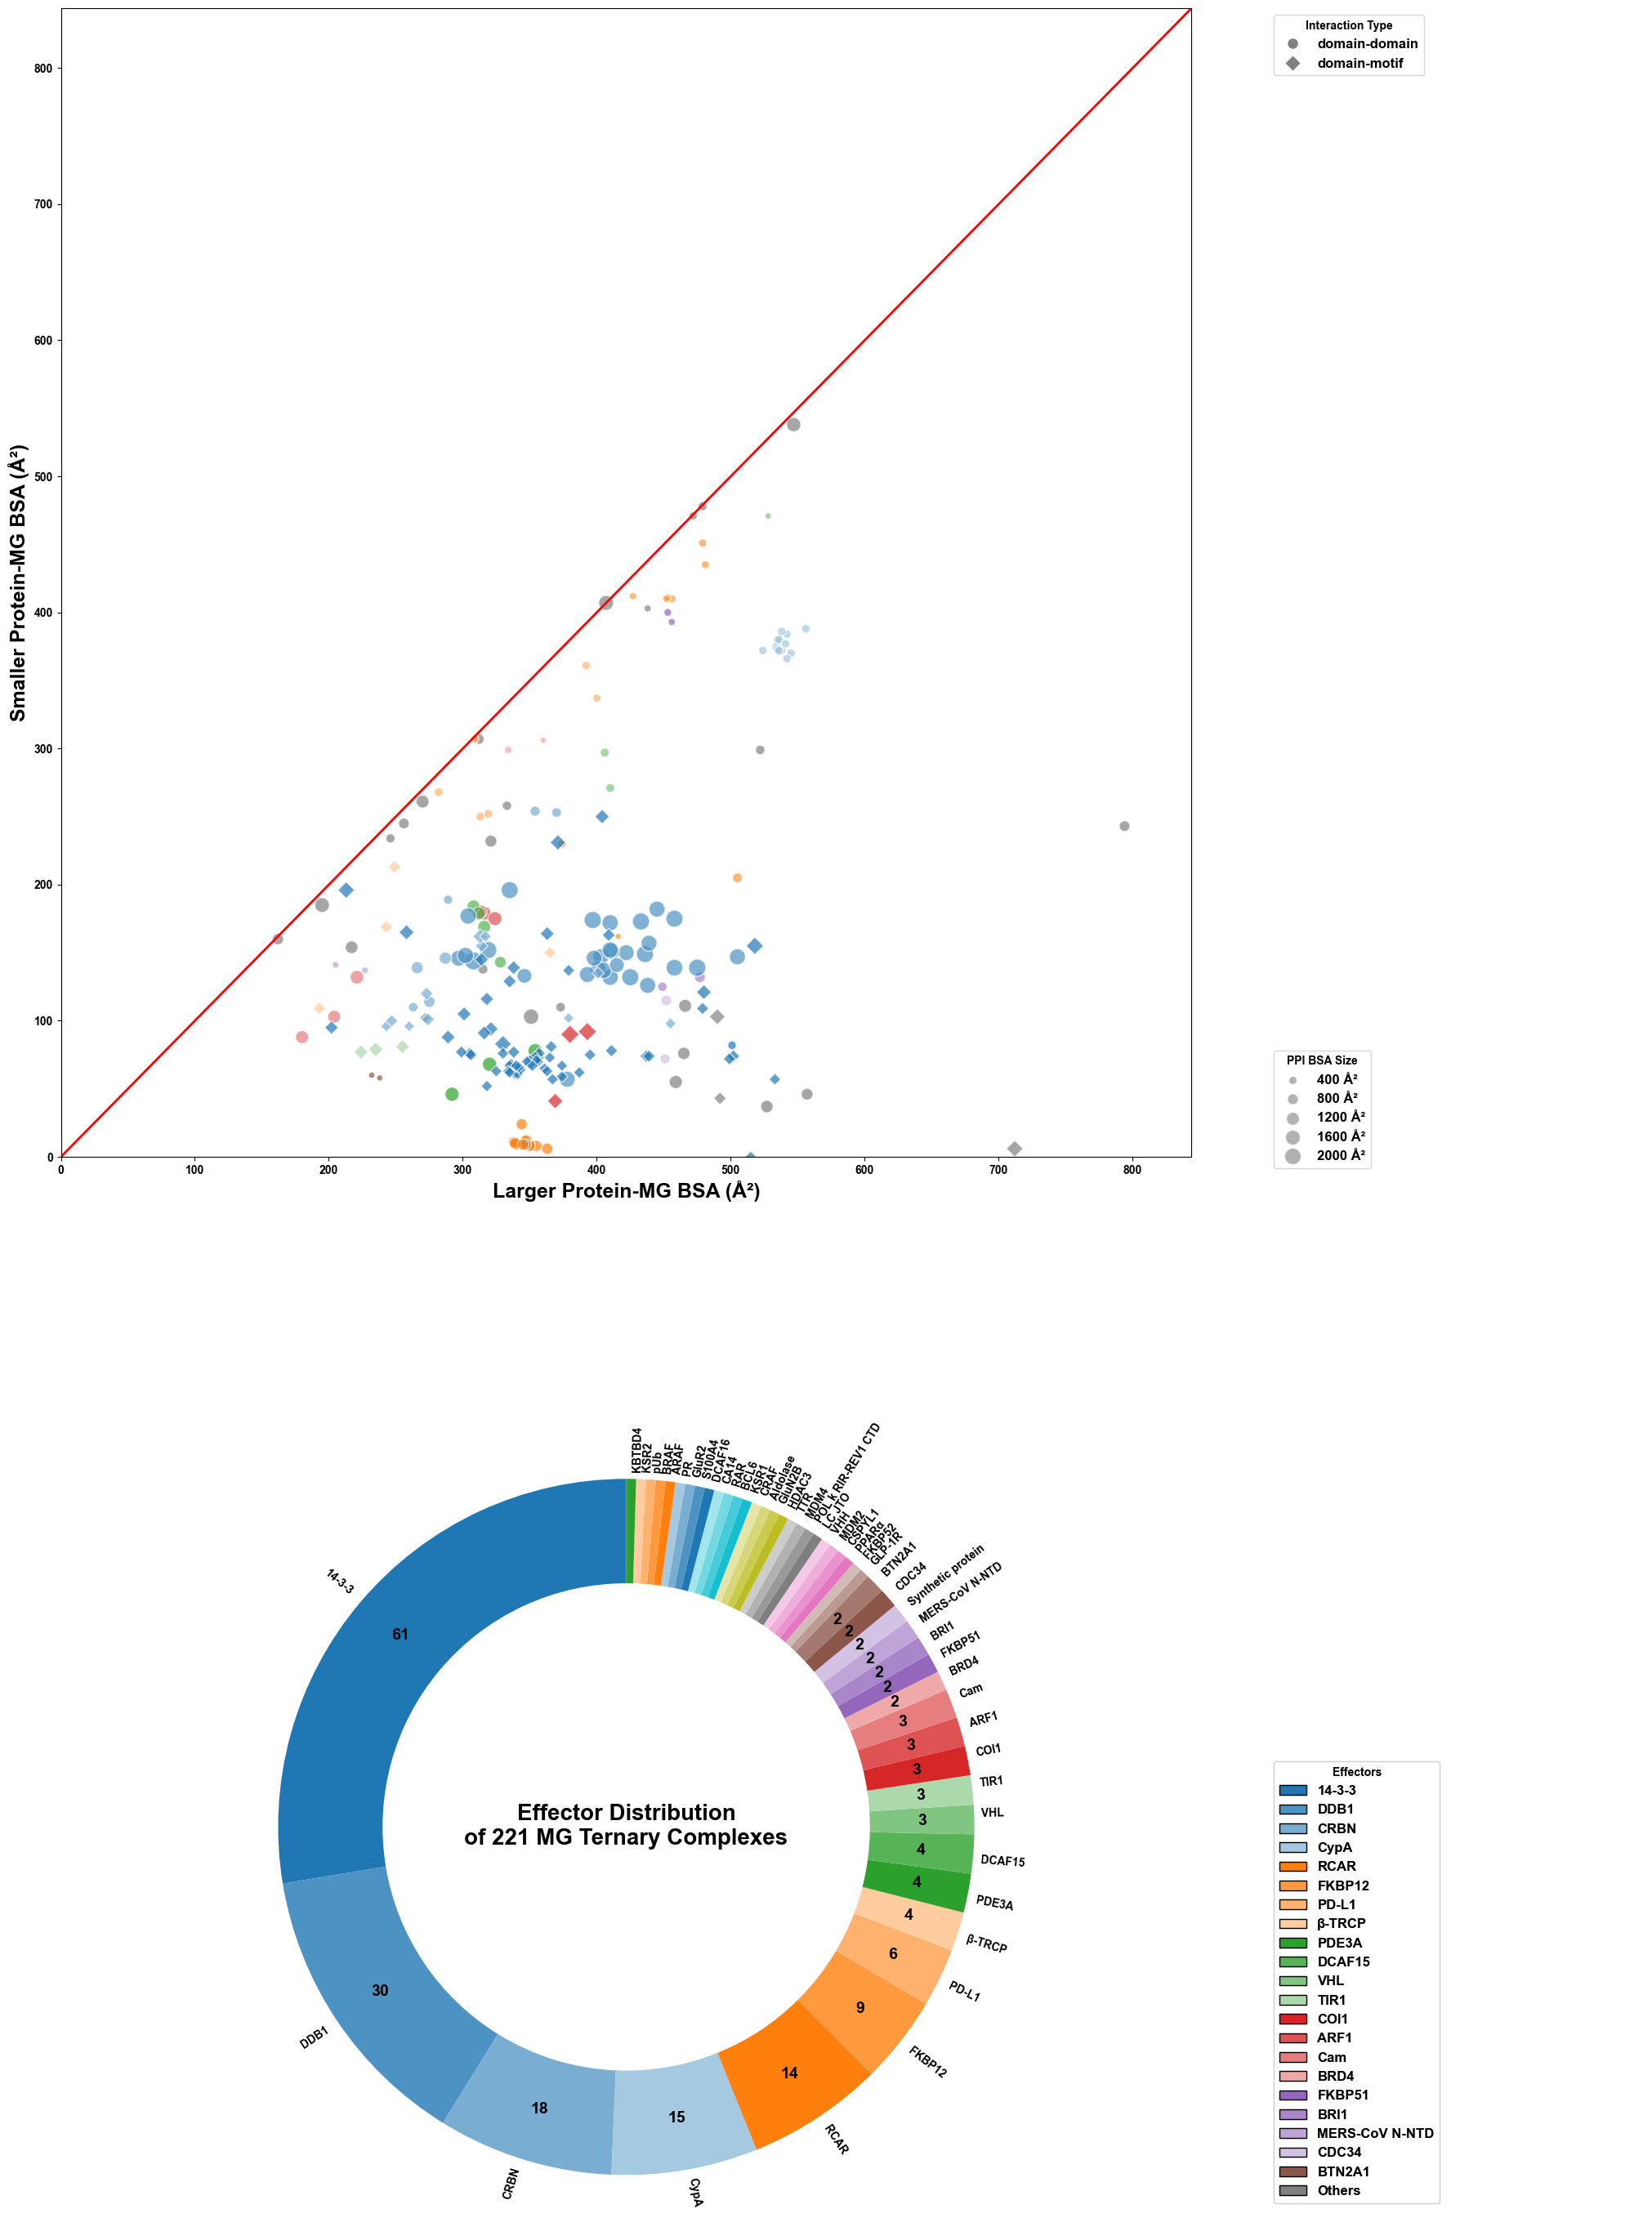

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba
import numpy as np
from itertools import cycle

bsa_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MG_noncovalent_bsa_no_cutoff.xlsx")

effector_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/1_MG_ternary_benchmark_with_release.xlsx")

effector_df.rename(columns={'Domain Type': 'domain_type'}, inplace=True)
effector_df.rename(columns={'PDBID': 'pdb_id'}, inplace=True)

merged_df = pd.merge(bsa_df, effector_df[['pdb_id', 'Effector', 'domain_type']], on='pdb_id', how='left')

effector_counts = effector_df['Effector'].value_counts().sort_values(ascending=False)

base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

gradient_colors = []
for base in base_colors:
    for level in range(4):
        mix = level / 5.0
        rgba = to_rgba(base)
        r = rgba[0] + (1 - rgba[0]) * mix
        g = rgba[1] + (1 - rgba[1]) * mix
        b = rgba[2] + (1 - rgba[2]) * mix
        a = rgba[3]
        gradient_colors.append((r, g, b, a))

color_cycle_bsa = cycle(gradient_colors)
effector_to_color_bsa = {}
others_count_bsa = 0

for effector, count in effector_counts.items():
    if count <= 1 or effector == 'Synthetic protein':
        others_count_bsa += count
    else:
        effector_to_color_bsa[effector] = next(color_cycle_bsa)

effector_to_color_bsa['Others'] = 'gray'

def get_color_bsa(row):
    if row['Effector'] in effector_to_color_bsa:
        return effector_to_color_bsa[row['Effector']]
    else:
        return effector_to_color_bsa['Others']

merged_df['color_bsa'] = merged_df.apply(get_color_bsa, axis=1)

color_cycle_pie = cycle(gradient_colors)
effector_to_color_pie = {}

for effector in effector_counts.index:
    effector_to_color_pie[effector] = next(color_cycle_pie)

fig = plt.figure(figsize=(25, 35))
gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[3, 2], hspace=0.3, wspace=0.1)

ax1 = fig.add_subplot(gs[0, 0])  
ax2 = fig.add_subplot(gs[1, 0])  
ax_legend = fig.add_subplot(gs[:, 1])  
ax_legend.axis('off')  

shapes = {'domain-domain': 'o', 'domain-motif': 'D'}

for domain_type, shape in shapes.items():
    subset = merged_df[merged_df['domain_type'] == domain_type]
    if not subset.empty:
        ax1.scatter(
            subset['larger_bsa'], 
            subset['small_bsa'],
            s=subset['ppi_bsa'] * 0.1 + 10,
            c=subset['color_bsa'],
            marker=shape,
            alpha=0.7,
            edgecolors='w',
            label=f"{domain_type} ({len(subset)} complexes)"
        )

max_val = max(merged_df['larger_bsa'].max(), merged_df['small_bsa'].max())
ax1.plot([0, max_val+50], [0, max_val+50], 'r-', linewidth=2)

ax1.set_xlim(0, max_val+50)
ax1.set_ylim(0, max_val+50)


ax1.set_xlabel('Larger Protein-MG BSA (Å²)', fontsize=18)
ax1.set_ylabel('Smaller Protein-MG BSA (Å²)', fontsize=18)



shape_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='domain-domain',
           markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='D', color='w', label='domain-motif',
           markerfacecolor='gray', markersize=10)
]

effector_legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=effector)
    for effector, color in effector_to_color_bsa.items() if effector != 'Others'
]
effector_legend_elements.append(Patch(facecolor='gray', edgecolor='black', label='Others'))

size_legend_sizes = [400, 800, 1200, 1600, 2000]
size_legend_labels = ['400 Å²', '800 Å²', '1200 Å²', '1600 Å²', '2000 Å²']
size_legend_handles = []
for size, label in zip(size_legend_sizes, size_legend_labels):
    handle = ax_legend.scatter([], [], s=size * 0.1 + 10, c='gray', alpha=0.6, edgecolors='w', label=label)
    size_legend_handles.append(handle)

shape_legend = ax_legend.legend(handles=shape_legend_elements, title='Interaction Type', loc='upper left', fontsize=12)
size_legend = ax_legend.legend(handles=size_legend_handles, title='PPI BSA Size', loc='center left', fontsize=12)
effector_legend = ax_legend.legend(handles=effector_legend_elements, title='Effectors', loc='lower left', fontsize=12)

ax_legend.add_artist(shape_legend)
ax_legend.add_artist(size_legend)
ax_legend.add_artist(effector_legend)

target_effectors = []

new_counts = []
new_labels = []

for effector in effector_counts.index:
    count = effector_counts.loc[effector]
    if effector in target_effectors:
        sub_df = effector_df[effector_df['Effector'] == effector]
        domain_counts = sub_df['domain_type'].value_counts()
        dd_count = domain_counts.get('domain-domain', 0)
        dm_count = domain_counts.get('domain-motif', 0)
        if dd_count > 0:
            new_counts.append(dd_count)
            new_labels.append(f"{effector} (domain-domain)")
        if dm_count > 0:
            new_counts.append(dm_count)
            new_labels.append(f"{effector} (domain-motif)")
    else:
        new_counts.append(count)
        new_labels.append(effector)

counts = np.array(new_counts)
labels = new_labels
total = counts.sum()

def make_autopct(values, total):
    def my_autopct(pct):
        val = int(round(pct * total / 100.0))
        return f'{val}' if val >= 2 else ''
    return my_autopct

color_cycle_pie = cycle(gradient_colors)
colors_pie = []
hatch_flags = [False] * len(labels)

for i, label in enumerate(labels):
    if '(domain-motif)' in label:
        base_name = label.split(' ')[0]  
        color = effector_to_color_pie.get(base_name, 'gray')
        colors_pie.append(color)
        hatch_flags[i] = True
    elif '(domain-domain)' in label:
        base_name = label.split(' ')[0]
        color = effector_to_color_pie.get(base_name, 'gray')
        colors_pie.append(color)
        hatch_flags[i] = False
    else:
        color = effector_to_color_pie.get(label, 'gray')
        colors_pie.append(color)

patches, texts, autotexts = ax2.pie(
    counts,
    labels=labels,
    autopct=make_autopct(counts, total),
    labeldistance=1.02,
    pctdistance=0.85,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor=None),
    rotatelabels=True,
    colors=colors_pie
)

for i, patch in enumerate(patches):
    if hatch_flags[i]:
        patch.set_hatch('///')
        patch.set_edgecolor('white')
        patch.set_zorder(2)
    else:
        patch.set_zorder(1)




for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(14)

ax2.text(0, 0, 'Effector Distribution\nof 221 MG Ternary Complexes', 
         ha='center', va='center', fontsize=20)

ax2.axis('equal')



## MGBench metics distribution & pass rates

/tmp/ipykernel_2508060/246093395.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="DockQ", data=melt_df, palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
/tmp/ipykernel_2508060/246093395.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Method", y="DockQ", data=melt_df, palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],


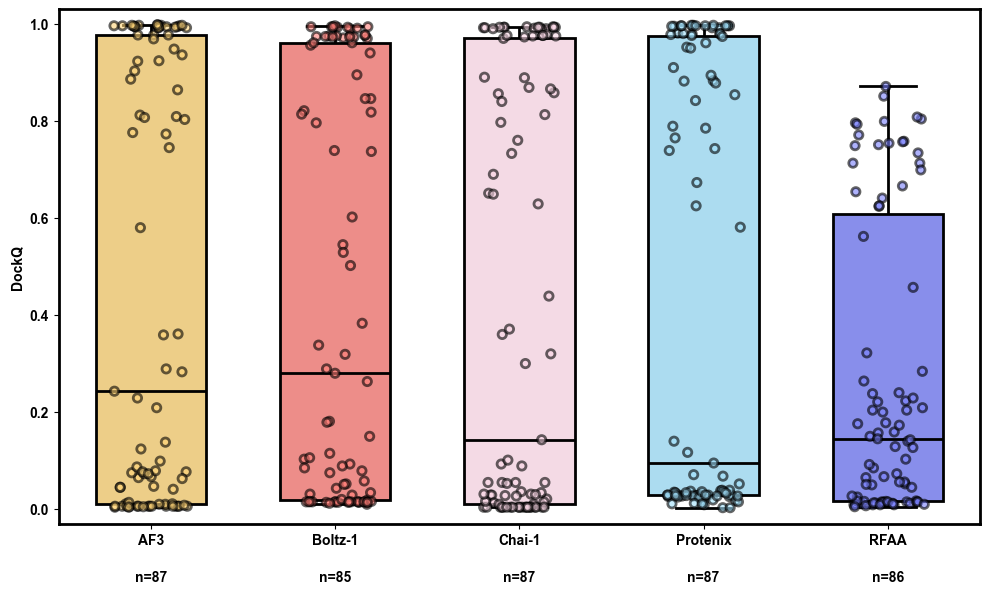

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# Load data
df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = pd.to_datetime(release_df['release_date'].str.strip())
valid_pdb_ids = release_df[release_df['release_date'] > '2021-09-30']['pdb_id'].str.upper().unique()
df = df[df['pdb_id'].isin(valid_pdb_ids)]

# Prepare data
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
melt_df = df.melt(id_vars="pdb_id", var_name="Method", value_name="DockQ")
melt_df["DockQ"] = pd.to_numeric(melt_df["DockQ"], errors="coerce")

method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]

# Plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.boxplot(x="Method", y="DockQ", data=melt_df, palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"], 
            linewidth=2, linecolor="black", width=0.6, showfliers=False, order=methods, ax=ax)
sns.stripplot(x="Method", y="DockQ", data=melt_df, palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
              edgecolor="black", linewidth=2, size=6, alpha=0.6, jitter=0.2, order=methods, ax=ax)

# Add sample size
counts = pd.DataFrame({'Method': methods, 'Count': [df[method].notna().sum() for method in methods]})
for i, row in counts.iterrows():
    ax.text(i, -0.09, f'n={row["Count"]}', ha='center', va='top', transform=ax.get_xaxis_transform())

# Add means
for i, method in enumerate(methods):
    mean_value = melt_df[melt_df['Method'] == method]['DockQ'].mean()


# Configure axes
plt.xlabel("")
plt.ylabel("DockQ")
plt.xticks(ticks=np.arange(len(methods)), labels=method_names)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(-0.03, 1.03)


# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
plt.tight_layout()
plt.show()

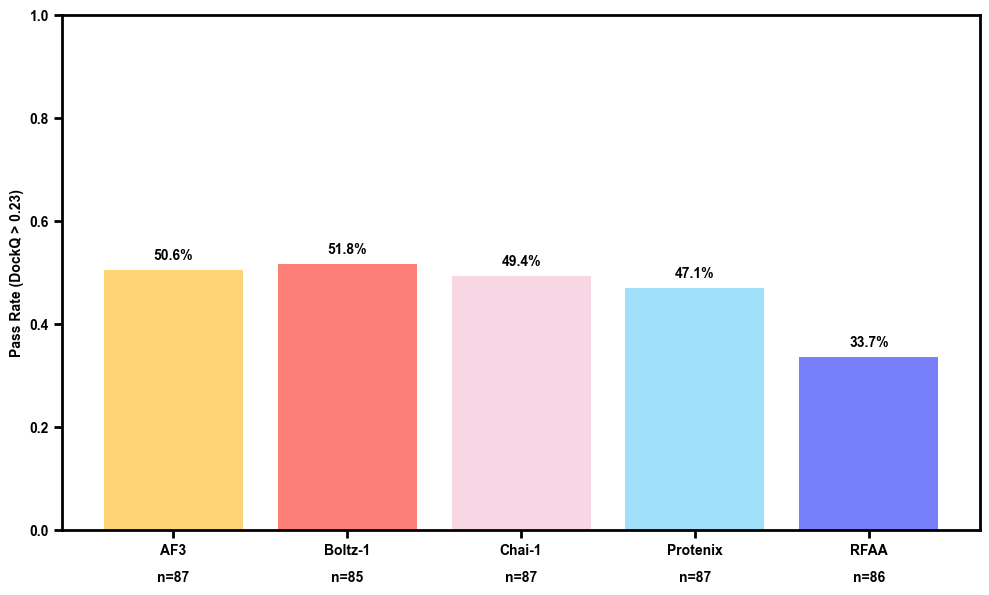

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = pd.to_datetime(release_df['release_date'].str.strip())
valid_pdb_ids = release_df[release_df['release_date'] > '2021-09-30']['pdb_id'].str.upper().unique()
df = df[df['pdb_id'].isin(valid_pdb_ids)]

# Define methods and prepare data
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
melt_df = df.melt(id_vars="pdb_id", var_name="Method", value_name="DockQ")
melt_df["DockQ"] = pd.to_numeric(melt_df["DockQ"], errors="coerce")

# Calculate pass rates and counts
counts = {m: df[m].notna().sum() for m in methods}
pass_rates = {m: (df[m] > 0.23).sum() / counts[m] if counts[m] > 0 else 0 for m in methods}

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Define custom colors
custom_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]

# Simple bar plot with specified colors
x = np.arange(len(methods))
y = [pass_rates[m] for m in methods]
bars = ax.bar(x, y, color=custom_colors)

# Add labels
for i, (rate, count) in enumerate(zip(y, [counts[m] for m in methods])):
    ax.text(i, rate + 0.02, f"{rate:.1%}", ha='center')
    ax.text(i, -0.1, f"n={count}", ha='center', transform=ax.get_xaxis_transform())

# Basic formatting
plt.xticks(x, ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"])
plt.ylabel("Pass Rate (DockQ > 0.23)")
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 1) # Set y-axis limit to be consistent
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.tick_params(axis='both', which='major', width=2, length=6)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2508060/2194039848.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2508060/2194039848.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


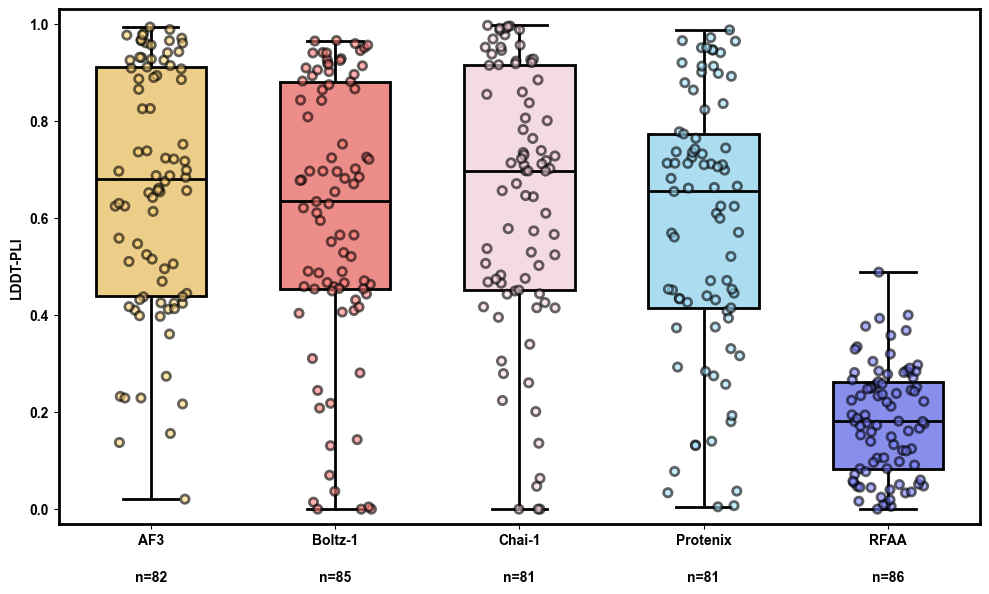

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scikit_posthocs as sp

# Load data
df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = pd.to_datetime(release_df['release_date'].str.strip())
valid_pdb_ids = release_df[release_df['release_date'] > '2021-09-30']['pdb_id'].str.upper().unique()
df = df[df['pdb_id'].isin(valid_pdb_ids)]

# Prepare data
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
melt_df = df.melt(id_vars="pdb_id", var_name="Method", value_name="lddtpli")
melt_df["lddtpli"] = pd.to_numeric(melt_df["lddtpli"], errors="coerce")

# Count valid data points
counts = pd.DataFrame({
    'Method': methods,
    'Count': [df[method].notna().sum() for method in methods]
})

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Boxplot with custom colors
sns.boxplot(
    x="Method",
    y="lddtpli",
    data=melt_df,
    palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
    linewidth=2,
    linecolor="black",
    width=0.6,
    showfliers=False,
    order=methods,
    ax=ax
)

# Individual data points
sns.stripplot(
    x="Method",
    y="lddtpli",
    data=melt_df,
    palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
    edgecolor="black",
    linewidth=2,
    size=6,
    alpha=0.6,
    jitter=0.2,
    order=methods,
    ax=ax
)

# Add sample size labels
for i, row in counts.iterrows():
    ax.text(i, -0.09, f'n={row["Count"]}', ha='center', va='top', transform=ax.get_xaxis_transform())

# Configure axes
plt.xlabel("")
plt.ylabel("LDDT-PLI")
plt.xticks(ticks=np.arange(len(methods)), labels=method_names)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(-0.03, 1.03)

# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2508060/1179588241.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2508060/1179588241.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


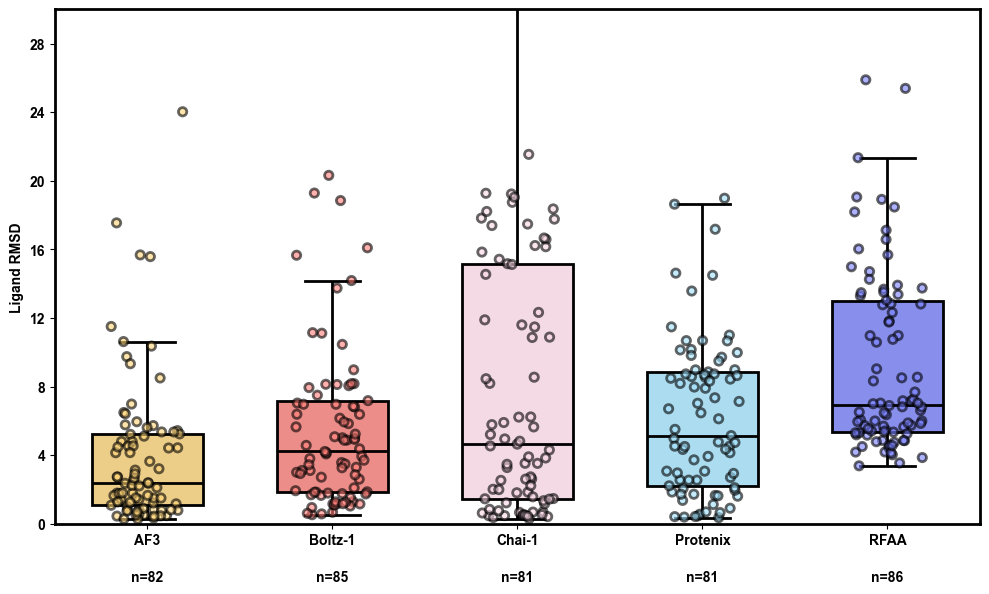

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = pd.to_datetime(release_df['release_date'].str.strip())
valid_pdb_ids = release_df[release_df['release_date'] > '2021-09-30']['pdb_id'].str.upper().unique()
df = df[df['pdb_id'].isin(valid_pdb_ids)]

# Prepare data
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
melt_df = df.melt(id_vars="pdb_id", var_name="Method", value_name="lrmsd")
melt_df["lrmsd"] = pd.to_numeric(melt_df["lrmsd"], errors="coerce")

# Count valid data points
counts = pd.DataFrame({
    'Method': methods,
    'Count': [df[method].notna().sum() for method in methods]
})

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Boxplot with custom colors
sns.boxplot(
    x="Method",
    y="lrmsd",
    data=melt_df,
    palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
    linewidth=2,
    linecolor="black",
    width=0.6,
    showfliers=False,
    order=methods,
    ax=ax
)

# Individual data points
sns.stripplot(
    x="Method",
    y="lrmsd",
    data=melt_df,
    palette=["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"],
    edgecolor="black",
    linewidth=2,
    size=6,
    alpha=0.6,
    jitter=0.2,
    order=methods,
    ax=ax
)

# Add sample size labels (position and style unified)
for i, row in counts.iterrows():
    ax.text(i, -0.09, f'n={row["Count"]}', ha='center', va='top', transform=ax.get_xaxis_transform())

# Configure axes
plt.xlabel("")
plt.ylabel("Ligand RMSD")
plt.xticks(ticks=np.arange(len(methods)), labels=method_names)
plt.yticks(np.arange(0, 30, 4))
plt.ylim(0, 30)

# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
plt.tight_layout()
plt.show()

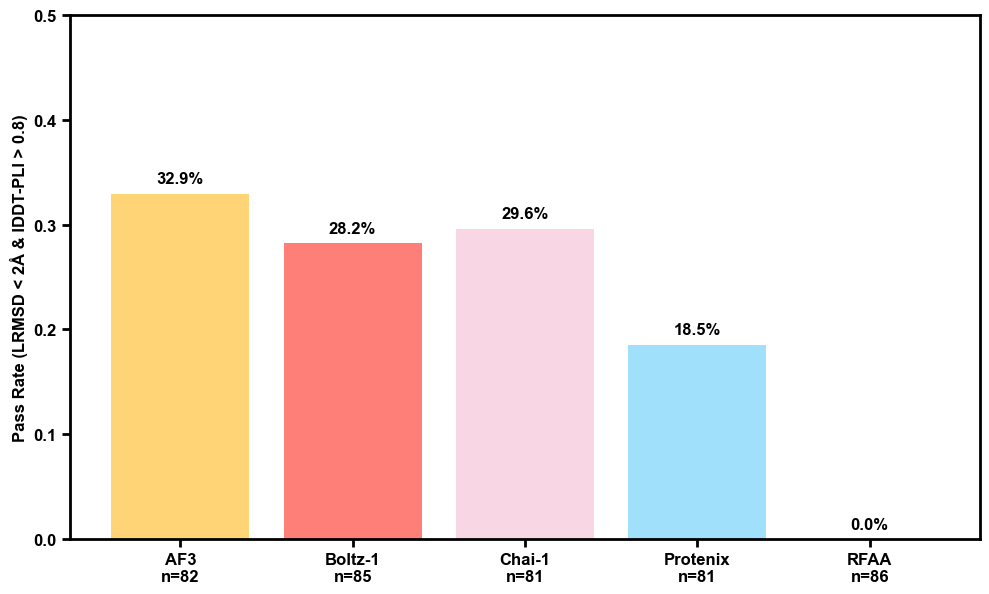

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df_lrmsd = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
df_lddtpli = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")

# Ensure 'pdb_id' is string and uppercase
df_lrmsd['pdb_id'] = df_lrmsd['pdb_id'].astype(str).str.upper()
df_lddtpli['pdb_id'] = df_lddtpli['pdb_id'].astype(str).str.upper()
release_df['pdb_id'] = release_df['pdb_id'].astype(str).str.upper()

# Filter by release date
release_df['release_date'] = pd.to_datetime(release_df['release_date'].str.strip())
valid_pdb_ids = release_df[release_df['release_date'] > '2021-09-30']['pdb_id'].unique()

# Apply filtering
df_lrmsd = df_lrmsd[df_lrmsd['pdb_id'].isin(valid_pdb_ids)]
df_lddtpli = df_lddtpli[df_lddtpli['pdb_id'].isin(valid_pdb_ids)]

# Define methods and short names
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]

# Calculate pass rates
pass_rates, counts = [], []
for method in methods:
    # Extract valid data for current method
    lrmsd_col = df_lrmsd[['pdb_id', method]].dropna()
    lddtpli_col = df_lddtpli[['pdb_id', method]].dropna()
    
    # Merge on pdb_id
    merged = pd.merge(lrmsd_col, lddtpli_col, on='pdb_id', suffixes=('_lrmsd', '_lddtpli'))
    total = len(merged)
    
    # Count passes (LRMSD < 2 & lDDT-PLI > 0.8)
    passed = len(merged[(merged[f"{method}_lrmsd"] < 2) & (merged[f"{method}_lddtpli"] > 0.8)])
    
    pass_rates.append(passed / total if total > 0 else 0)
    counts.append(total)

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Define custom colors
custom_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]

# Simple bar plot
x = np.arange(len(methods))
y = pass_rates
bars = ax.bar(x, y, color=custom_colors)

# Add labels
for i, (rate, count) in enumerate(zip(y, counts)):
    ax.text(i, rate + 0.01, f"{rate:.1%}", ha='center', fontsize=12)
    ax.text(i, -0.08, f"n={count}", ha='center', transform=ax.get_xaxis_transform(), fontsize=12)

# Basic formatting
plt.xticks(x, method_names, fontsize=12)
plt.ylabel("Pass Rate (LRMSD < 2Å & lDDT-PLI > 0.8)", fontsize=12)
plt.yticks(np.arange(0, 0.6, 0.1), fontsize=12)
plt.ylim(0, 0.5)

# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.tick_params(axis='both', which='major', width=2, length=6)
plt.tight_layout()
plt.show()

## Homology analysis

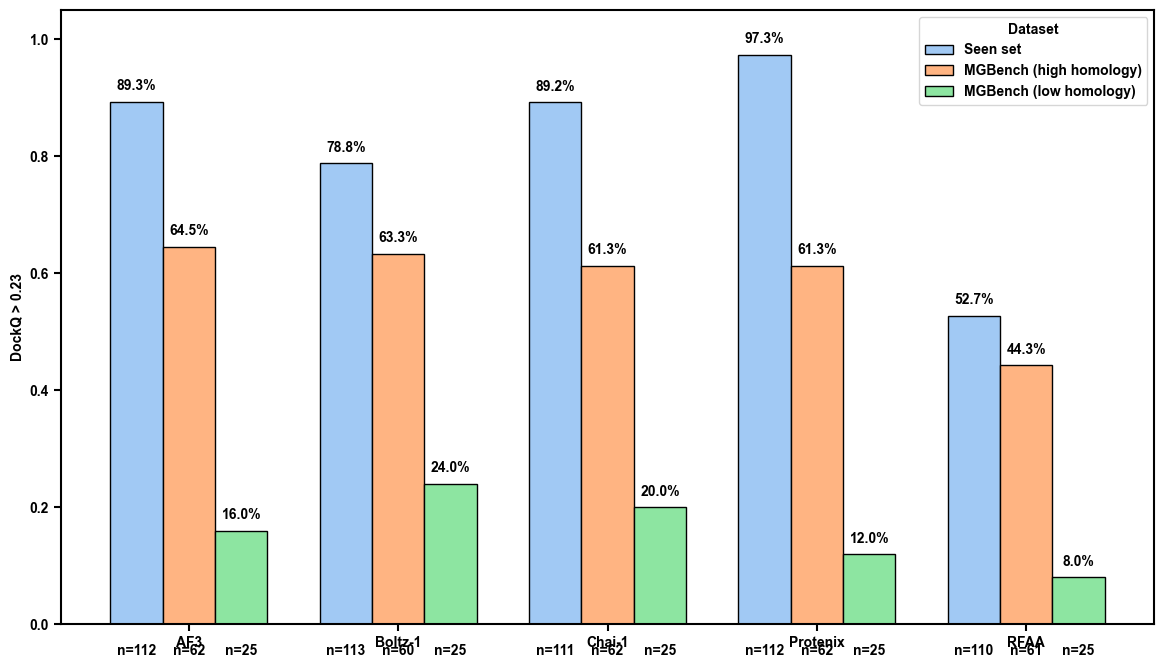

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")

methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]

# Group files
group_files = {
    "Seen set": "/data02/liaoyy/MG_ternary_benchmark/MG-PDB_resolution_filtered_training.xlsx",
    "MGBench (high homology)": "/data02/liaoyy/MG_ternary_benchmark/MGBench_homo.xlsx",
    "MGBench (low homology)": "/data02/liaoyy/MG_ternary_benchmark/MGBench_nonhomo.xlsx",
}

# Read PDB IDs
group_pdbs = {}
for group_name, file_path in group_files.items():
    temp_df = pd.read_excel(file_path)
    group_pdbs[group_name] = set(temp_df['pdb_id'].str.upper().unique())

# Calculate pass rates
records = []
threshold = 0.23

for group_name, pdb_set in group_pdbs.items():
    subset_df = df[df['pdb_id'].isin(pdb_set)]
    
    for method in methods:
        valid_values = subset_df[method].dropna()
        count = len(valid_values)
        pass_rate = (valid_values > threshold).sum() / count if count > 0 else 0

        records.append({
            'Group': group_name,
            'Method': method,
            'PassRate': pass_rate,
            'Count': count
        })

rate_df = pd.DataFrame(records)

# Plot
plt.figure(figsize=(12, 7))
ax = plt.gca()

# Define color palette
groups = list(group_files.keys())
colors = sns.color_palette("pastel", n_colors=len(groups))
color_map = dict(zip(groups, colors))

# Bar plot settings
x = np.arange(len(methods))
width = 0.25
n_groups = len(groups)

# Create bars for each group
for i, group in enumerate(groups):
    group_data = rate_df[rate_df['Group'] == group]['PassRate'].values
    # Calculate bar positions
    bar_positions = x - (n_groups - 1) * width / 2 + i * width
    ax.bar(bar_positions, group_data, width=width, color=color_map[group], 
           edgecolor='black', linewidth=1, label=group)

# Add labels
for i, row in rate_df.iterrows():
    group_index = groups.index(row['Group'])
    method_index = methods.index(row['Method'])
    bar_x = x[method_index] - (n_groups - 1) * width / 2 + group_index * width
    
    # Add pass rate text
    ax.text(bar_x, row['PassRate'] + 0.02, f"{row['PassRate']:.1%}", 
            ha='center')
    # Add count text
    ax.text(bar_x, -0.05, f"n={row['Count']}", ha='center', 
            transform=ax.get_xaxis_transform())


# Format axes and layout
ax.set_xticks(x)
ax.set_xticklabels(method_names)
ax.set_ylabel("DockQ > 0.23")
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(0, 1.05)
ax.legend(title="Dataset")

# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', width=1.5, length=5)
plt.tight_layout(pad=2)
plt.show()

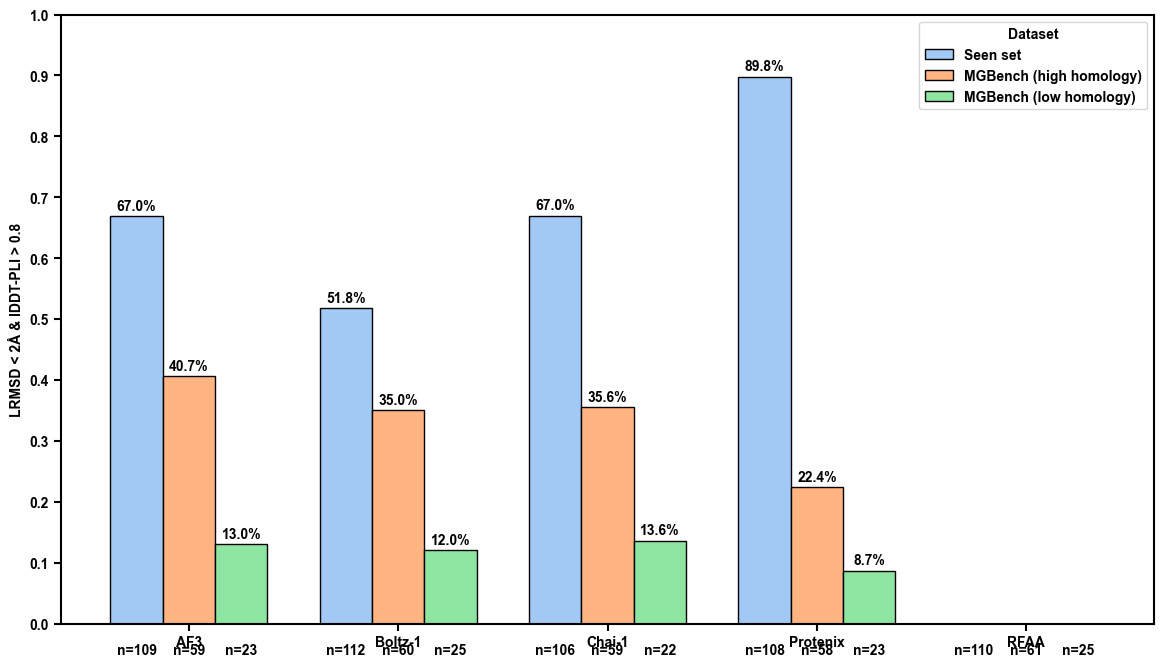

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
df_lrmsd = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
df_lddtpli = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")

methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
method_names = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]

# Group files
group_files = {
    "Seen set": "/data02/liaoyy/MG_ternary_benchmark/MG-PDB_resolution_filtered_training.xlsx",
    "MGBench (high homology)": "/data02/liaoyy/MG_ternary_benchmark/MGBench_homo.xlsx",
    "MGBench (low homology)": "/data02/liaoyy/MG_ternary_benchmark/MGBench_nonhomo.xlsx",
}

# Read PDB IDs
group_pdbs = {}
for group_name, file_path in group_files.items():
    tmp_df = pd.read_excel(file_path)
    group_pdbs[group_name] = set(tmp_df['pdb_id'].str.upper().unique())

# Calculate pass rates
records = []
for group_name, pdb_set in group_pdbs.items():
    df_lrmsd_subset = df_lrmsd[df_lrmsd['pdb_id'].isin(pdb_set)]
    df_lddtpli_subset = df_lddtpli[df_lddtpli['pdb_id'].isin(pdb_set)]
    
    for method in methods:
        lrmsd_valid = df_lrmsd_subset[['pdb_id', method]].dropna()
        lddtpli_valid = df_lddtpli_subset[['pdb_id', method]].dropna()
        
        merged = pd.merge(lrmsd_valid, lddtpli_valid, on='pdb_id')
        total = len(merged)
        
        if total == 0:
            pass_rate = 0
        else:
            passed = merged[(merged.iloc[:, 1] < 2) & (merged.iloc[:, 2] > 0.8)]
            pass_rate = len(passed) / total
        
        records.append({
            'Group': group_name,
            'Method': method,
            'PassRate': pass_rate,
            'Count': total
        })

rate_df = pd.DataFrame(records)

# Create plot
plt.figure(figsize=(12, 7))
ax = plt.gca()

# Define color palette
groups = list(group_files.keys())
colors = sns.color_palette("pastel", n_colors=len(groups))
color_map = dict(zip(groups, colors))

# Bar plot settings
x = np.arange(len(methods))
width = 0.25
n_groups = len(groups)

# Create bars for each group
for i, group in enumerate(groups):
    group_data = rate_df[rate_df['Group'] == group]['PassRate'].values
    # Calculate bar positions to center the group
    bar_positions = x - (n_groups - 1) * width / 2 + i * width
    ax.bar(bar_positions, group_data, width=width, color=color_map[group], 
           edgecolor='black', linewidth=1, label=group)

# Add labels
for i, row in rate_df.iterrows():
    group_index = groups.index(row['Group'])
    method_index = methods.index(row['Method'])
    bar_x = x[method_index] - (n_groups - 1) * width / 2 + group_index * width
    
    # Add pass rate text
    if row['PassRate'] > 0: # Only add label if rate > 0
        ax.text(bar_x, row['PassRate'] + 0.01, f"{row['PassRate']:.1%}", 
                ha='center')
    # Add count text
    ax.text(bar_x, -0.05, f"n={row['Count']}", ha='center', 
            transform=ax.get_xaxis_transform())

# Format axes and layout
ax.set_xticks(x)
ax.set_xticklabels(method_names)
ax.set_ylabel("LRMSD < 2Å & lDDT-PLI > 0.8")
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.legend(title="Dataset")

# Final styling
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', width=1.5, length=5)
plt.tight_layout(pad=2)
plt.show()

## Analysis of key factors

/tmp/ipykernel_2508060/4104804505.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('AtomGroup')
/tmp/ipykernel_2508060/4104804505.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('AtomGroup')
/tmp/ipykernel_2508060/4104804505.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('AtomGroup')
/tmp/ipykernel_2508060/4104804505.py:53: Futur

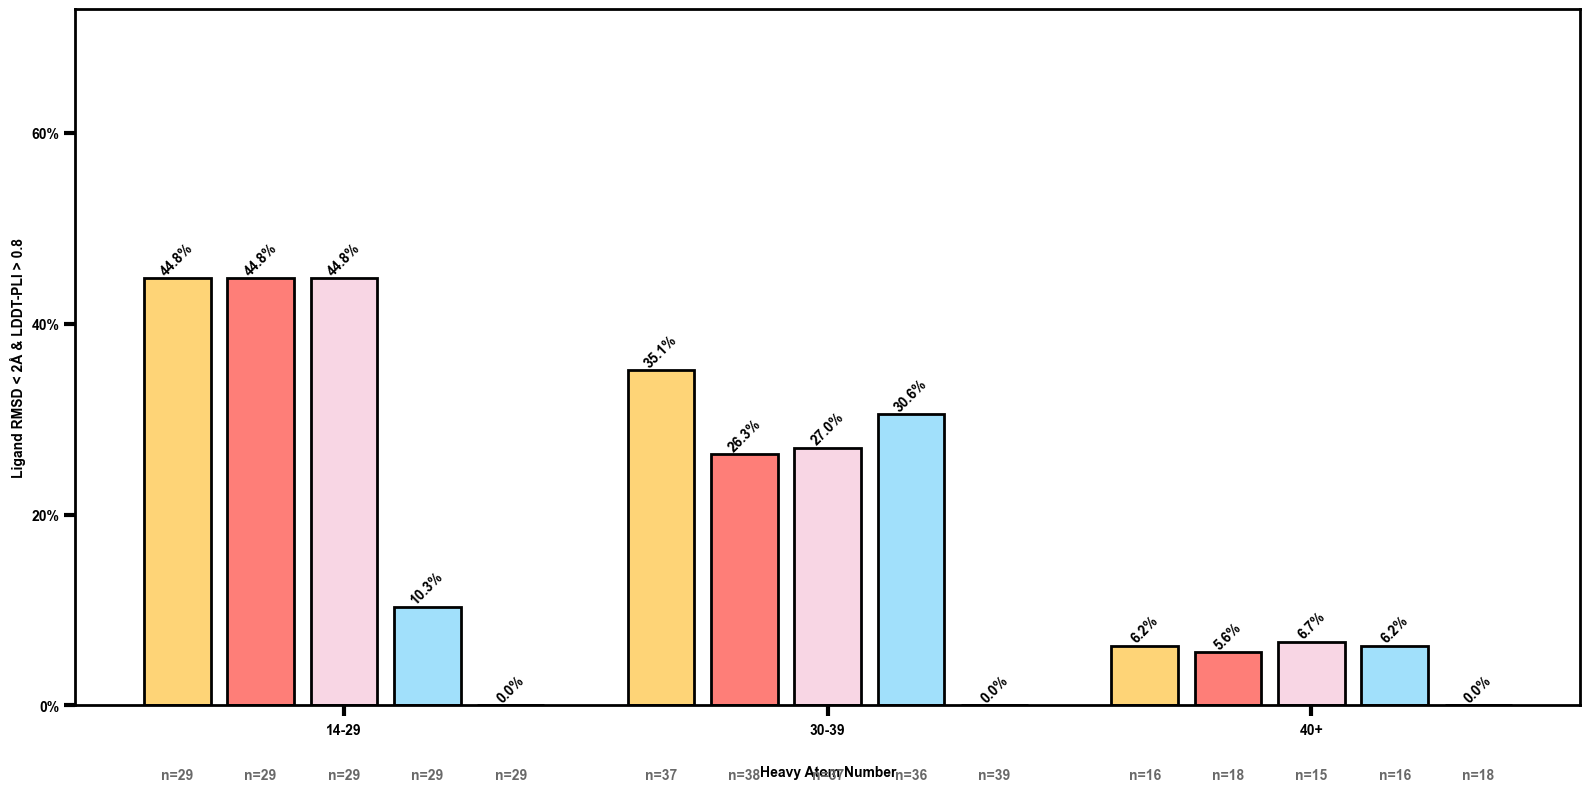

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
df_lrmsd = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
df_lddtpli = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")
methods = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()
df_lrmsd['pdb_id'] = df_lrmsd['pdb_id'].str.upper()
df_lrmsd = df_lrmsd[df_lrmsd['pdb_id'].isin(valid_pdb_ids)]
df_lddtpli['pdb_id'] = df_lddtpli['pdb_id'].str.upper()
df_lddtpli = df_lddtpli[df_lddtpli['pdb_id'].isin(valid_pdb_ids)]
merged = pd.merge(
    df_lrmsd[["pdb_id"] + methods],
    df_lddtpli[["pdb_id"] + methods],
    on="pdb_id",
    suffixes=("_lrmsd", "_lddtpli")
)
excel_path = "/data02/liaoyy/MG_ternary_benchmark/data/1_MG_ternary_benchmark_with_release.xlsx"
df_excel = pd.read_excel(excel_path)[['pdb_id', 'HeavyAtoms']]
merged['pdb_id_upper'] = merged['pdb_id'].str.upper()
df_excel['pdb_id_upper'] = df_excel['pdb_id'].str.upper()
merged = pd.merge(
    merged,
    df_excel[['pdb_id_upper', 'HeavyAtoms']],
    on='pdb_id_upper',
    how='left'
).drop('pdb_id_upper', axis=1)
min_heavy = merged['HeavyAtoms'].min(skipna=True)
if min_heavy < 30:
    bins = [min_heavy, 30, 40, float('inf')]
    labels = [f"{int(min_heavy)}-29", "30-39", "40+"]
else:
    bins = [min_heavy, 40, float('inf')]
    labels = [f"{int(min_heavy)}-39", "40+"]
merged['AtomGroup'] = pd.cut(
    merged['HeavyAtoms'],
    bins=bins,
    labels=labels,
    right=False
)
results = []
for method in methods:
    temp_df = merged[
        merged[[f"{method}_lrmsd", f"{method}_lddtpli"]].notna().all(axis=1)
    ]
    grouped = temp_df.groupby('AtomGroup')
    for name, group in grouped:
        total = len(group)
        pass_count = (
            (group[f"{method}_lrmsd"] < 2) &
            (group[f"{method}_lddtpli"] > 0.8)
        ).sum()
        pass_rate = pass_count / total if total > 0 else 0
        results.append({
            'Method': method,
            'AtomGroup': name,
            'PassRate': pass_rate,
            'Total': total,
            'PassCount': pass_count
        })
rate_df = pd.DataFrame(results)
plt.figure(figsize=(16, 8))
ax = plt.gca()
custom_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
palette = custom_colors
method_colors = dict(zip(methods, custom_colors))
n_methods = len(methods)
group_positions = np.arange(len(labels)) * (n_methods + 0.8)
for group_idx, atom_group in enumerate(labels):
    group_data = rate_df[rate_df['AtomGroup'] == atom_group]
    bar_positions = group_positions[group_idx] + np.arange(n_methods)
    for idx, (_, row) in enumerate(group_data.iterrows()):
        ax.bar(
            bar_positions[idx],
            row['PassRate'],
            width=0.8,
            color=method_colors[row['Method']],
            edgecolor='black',
            linewidth=2,
            zorder=2
        )
        ax.text(
            bar_positions[idx], row['PassRate'],
            f"{row['PassRate']:.1%}", rotation=45,
            ha='center', va='bottom', color='black'
        )
        ax.text(
            bar_positions[idx], -0.09,
            f"n={row['Total']}",
            ha='center', va='top',
            color='dimgrey',
            transform=ax.get_xaxis_transform()
        )
ax.set_xticks(group_positions + (n_methods-1)/2)
ax.set_xticklabels(
    [f"{label}" for label in labels],
    rotation=0,
    ha='center'
)
ax.set_ylim(0, 0.73)
ax.set_ylabel("Ligand RMSD < 2Å & LDDT-PLI > 0.8", )
ax.set_xlabel("Heavy Atom Number" ,labelpad=20)
plt.yticks(
    np.arange(0, 0.73, 0.2),
    labels=[f'{i:.0%}' for i in np.arange(0, 0.73, 0.2)],
)
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5)
ax.tick_params(axis='y')
ax.tick_params(axis='both', which='major', width=3, length=8)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2508060/718118308.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = plot_df.groupby(['BSA_Group', 'Method'])['DockQ'].mean().reset_index()


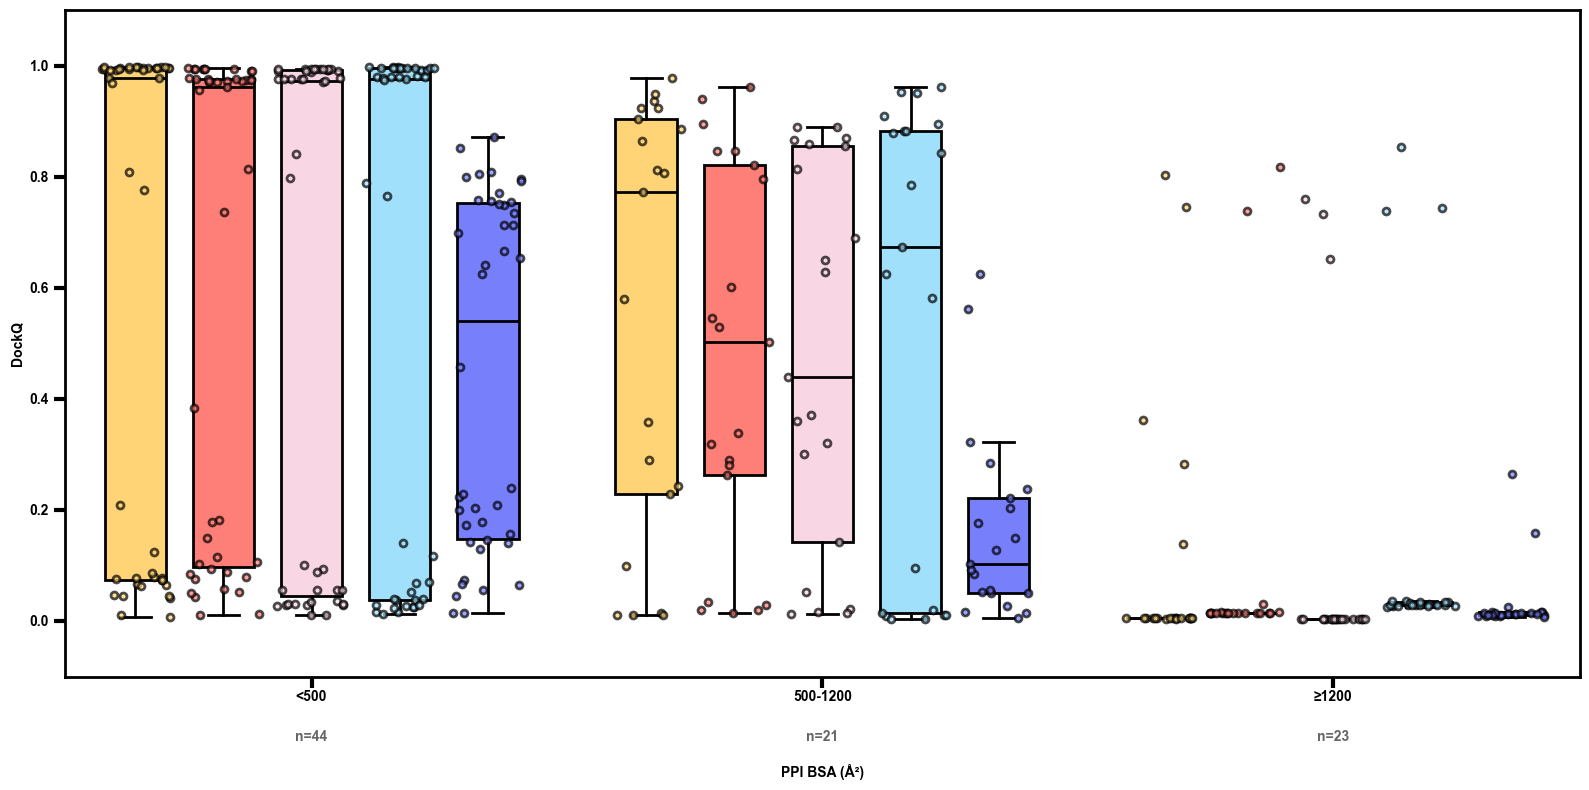

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
METHODS = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
METHODS_name = ["AF3", "Boltz-1", "Chai-1",  "Protenix", "RFAA"]
dockq_df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")
bsa_df = pd.read_excel(
    "/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx",
    usecols=["pdb_id", "ppi_bsa"]
)
merged_df = pd.merge(dockq_df, bsa_df, on="pdb_id", how="inner")
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()
merged_df = merged_df[merged_df['pdb_id'].isin(valid_pdb_ids)]
bins = [-np.inf, 500, 1200, np.inf]
labels = ['<500', '500-1200', '≥1200']
merged_df['BSA_Group'] = pd.cut(
    merged_df['ppi_bsa'],
    bins=bins,
    labels=labels,
    right=False
)
group_counts = merged_df['BSA_Group'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
ax = plt.gca()
custom_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
method_colors = dict(zip(METHODS, custom_colors))
plot_df = merged_df.melt(
    id_vars=['pdb_id', 'BSA_Group'],
    value_vars=METHODS,
    var_name='Method',
    value_name='DockQ'
).dropna(subset=['DockQ'])
mean_values = plot_df.groupby(['BSA_Group', 'Method'])['DockQ'].mean().reset_index()
x_min, x_max = np.inf, -np.inf
y_min, y_max = np.inf, -np.inf
n_methods = len(METHODS)
group_positions = np.arange(len(labels)) * (n_methods + 0.8)
for group_idx, group_label in enumerate(labels):
    group_pos = group_positions[group_idx]
    for method_idx, method in enumerate(METHODS):
        subset = plot_df[
            (plot_df['BSA_Group'] == group_label) &
            (plot_df['Method'] == method)
        ]
        if not subset.empty:
            base_x = group_pos + method_idx
            jitter = np.random.uniform(-0.4, 0.4, size=len(subset))
            x = base_x + jitter
            y = subset['DockQ']
            ax.scatter(
                x, y,
                s=25,
                color=method_colors[method],
                edgecolor='black',
                linewidth=2,
                alpha=0.7,
                zorder=3
            )
    group_data = plot_df[plot_df['BSA_Group'] == group_label]
    box_positions = group_positions[group_idx] + np.arange(n_methods)
    plot_data = [group_data[group_data['Method'] == method]['DockQ'].dropna().tolist()
                for method in METHODS]
    boxplot = ax.boxplot(
        plot_data,
        positions=box_positions,
        widths=0.7,
        patch_artist=True,
        showfliers=False
    )
    for part in boxplot['boxes']:
        part.set(linewidth=2, edgecolor='black')
    for part in boxplot['whiskers']:
        part.set(linewidth=2, color='black')
    for part in boxplot['caps']:
        part.set(linewidth=2, color='black')
    for part in boxplot['medians']:
        part.set(linewidth=2, color='black')
    for method_idx, method in enumerate(METHODS):
        mean_val = mean_values[
            (mean_values['BSA_Group'] == group_label) &
            (mean_values['Method'] == method)
        ]['DockQ'].values
        if len(mean_val) > 0:
            x_pos = box_positions[method_idx]
            y_pos = mean_val[0]

            x_min = min(x_min, x_pos - 0.5)
            x_max = max(x_max, x_pos + 0.5)
            y_min = min(y_min, y_pos - 0.05)
            y_max = max(y_max, y_pos + 0.05)
    for patch, method in zip(boxplot['boxes'], METHODS):
        patch.set_facecolor(method_colors[method])
    for median in boxplot['medians']:
        median.set_color('black')
ax.set_xticks(group_positions + (n_methods-1)/2)
ax.set_xticklabels([])
all_positions = []
for group_idx, group_label in enumerate(labels):
    group_pos = group_positions[group_idx]
    for method_idx in range(n_methods):
        all_positions.append(group_pos + method_idx)
x_min = min(all_positions) - 0.8
x_max = max(all_positions) + 0.8
ax.set_xlim(x_min, x_max)
for i, label in enumerate(labels):
    x_position = group_positions[i] + (n_methods-1)/2
    count = group_counts.iloc[i]
    ax.text(
        x_position,
        -0.02,
        label,
        ha='center',
        va='top',
        transform=ax.get_xaxis_transform(),
        color='black'
    )
    ax.text(
        x_position,
        -0.08,
        f'n={count}',
        ha='center',
        va='top',
        transform=ax.get_xaxis_transform(),
        color='#666666'
    )
ax.set_xlabel('PPI BSA (Å²)', labelpad=50)
ax.set_ylabel('DockQ')
ax.set_ylim(-0.1, 1.1)
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5)
ax.tick_params(axis='y')
ax.tick_params(axis='both', which='major', width=3, length=8)
plt.tight_layout()
plt.show()

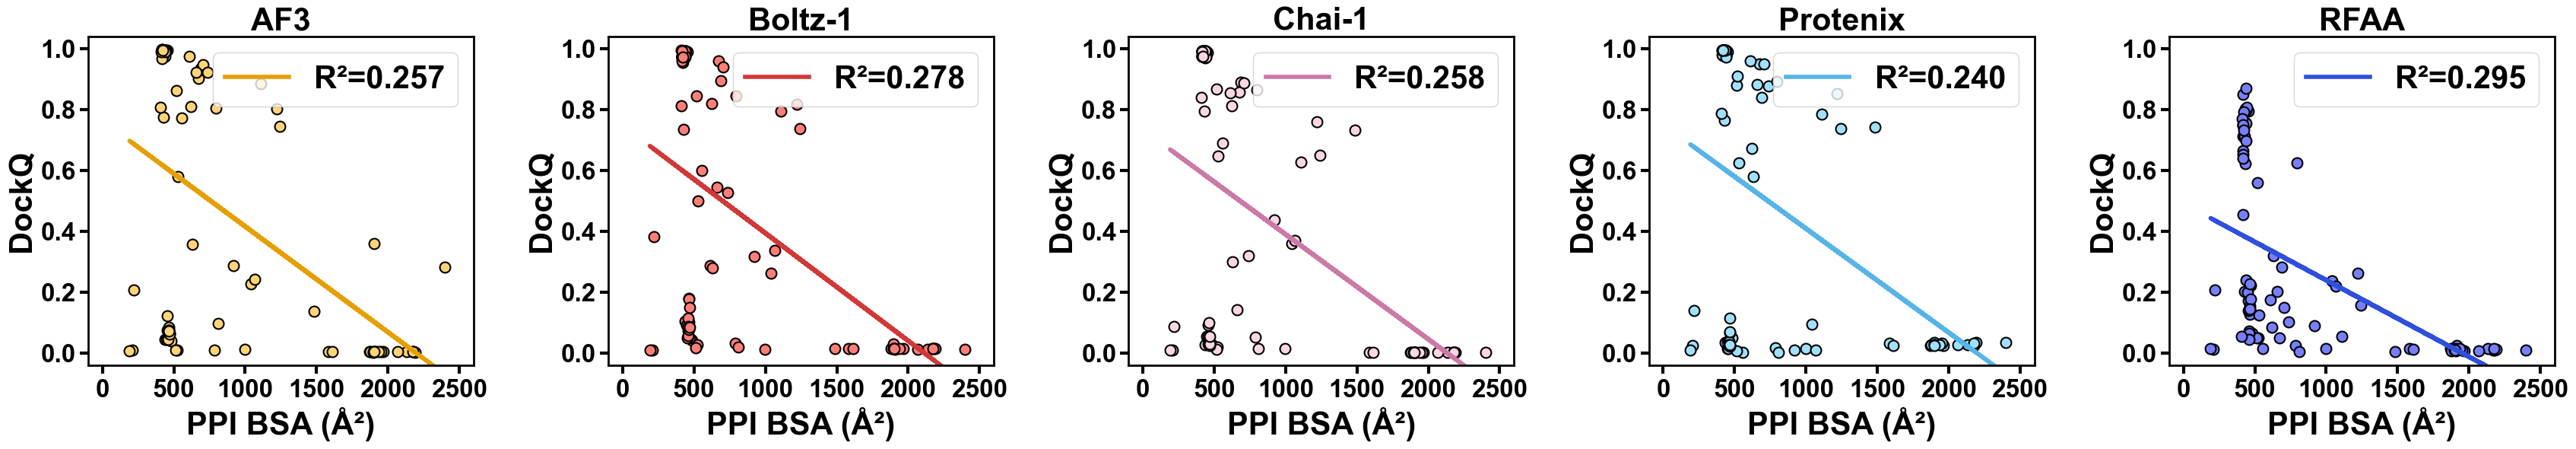

In [108]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from matplotlib.ticker import MultipleLocator


# Load DockQ scores data
dockq_df = pd.read_csv('/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv')
# Load BSA (Buried Surface Area) data
bsa_df = pd.read_excel('/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx')

# Merge DockQ scores with BSA values based on PDB ID
merged_df = pd.merge(dockq_df, bsa_df[['pdb_id', 'ppi_bsa']], on='pdb_id', how='left')

# Filter structures released after September 2021
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()  # Remove whitespace
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()
merged_df = merged_df[merged_df['pdb_id'].isin(valid_pdb_ids)]

# Define methods and their display names/colors
methods = ['af3', 'boltz-1', 'chai-1', 'protenix', 'RFAA']
METHODS_name = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
custom_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
line_colors = ["#E69F00", "#D23838", "#CC79A7", "#56B4E9", "#2F4FDD"]

# Create figure with 5 subplots (one for each method)
fig, axes = plt.subplots(1, 5, figsize=(34, 6))

# Plot each method's data in separate subplot
for i, (method, name) in enumerate(zip(methods, METHODS_name)):
    ax = axes[i]
    
    # Prepare data for current method
    temp_df = merged_df[['ppi_bsa', method]].dropna()
    x = temp_df['ppi_bsa']
    y = temp_df[method]
    
    # Create scatter plot
    sns.scatterplot(x=x, y=y, ax=ax, color=custom_colors[i],
                    edgecolor='black', linewidth=1.5,
                    s=100)
    
    # Calculate and plot linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color=line_colors[i], lw=4, 
            label=f'R²={r_value**2:.3f}')
    
    # Set subplot title and labels
    ax.set_title(name, fontsize=30)
    ax.set_xlabel('PPI BSA (Å²)', fontsize=30)
    ax.set_ylabel('DockQ', fontsize=30)
    ax.legend(loc='best', fontsize=30)

    # Set axis limits and ticks
    ax.set_xlim(-100, 2600)
    ax.set_ylim(-0.04, 1.04)
    ax.xaxis.set_major_locator(MultipleLocator(500))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))

    # Preserve existing style settings
    for spine in ax.spines.values():
        spine.set_linewidth(2.0)
    ax.xaxis.set_tick_params(pad=5) 
    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='both', which='major', width=3, length=8) 



# Adjust layout and save figure
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)


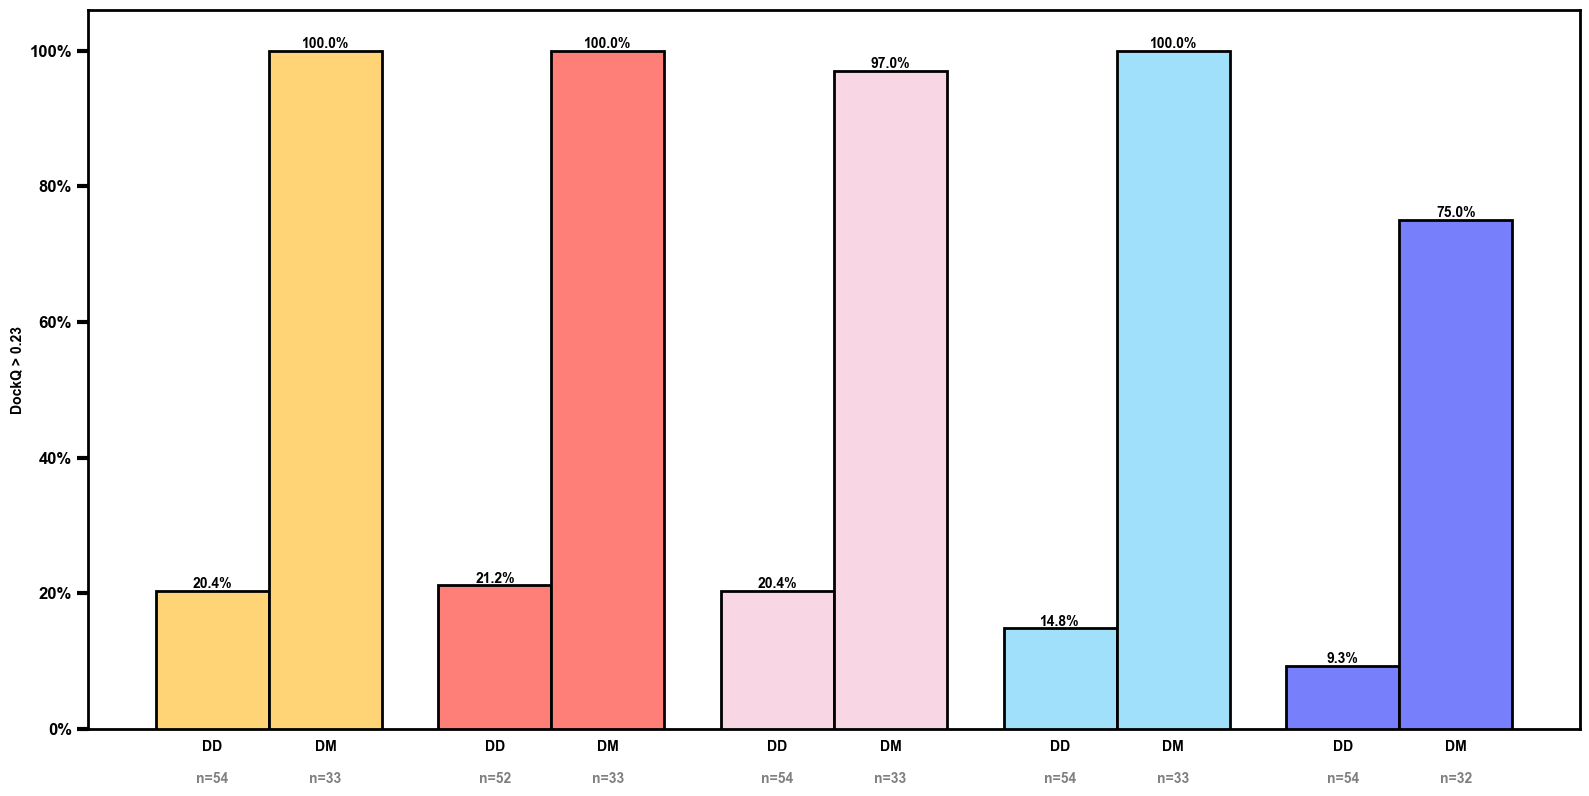

In [109]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 在绘图前添加以下代码
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 3 

# Constants definition
METHODS = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
METHOD_NAMES = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
DOMAIN_GROUPS = ['domain-domain', 'domain-motif']

# Data loading and preprocessing
dockq_df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")

bsa_df = pd.read_excel(
    "/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx",
    usecols=["pdb_id", "domain_type"]
)
bsa_df['Domain_Group'] = bsa_df['domain_type'].str.replace('_', '-')

# Data merging and filtering
merged_df = pd.merge(dockq_df, bsa_df, on="pdb_id", how="inner")

release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()  # Remove whitespace
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()

merged_df = merged_df[merged_df['pdb_id'].isin(valid_pdb_ids)]

# Data transformation
melt_df = merged_df.melt(
    id_vars=["pdb_id", "Domain_Group"],
    value_vars=METHODS,
    var_name="Method",
    value_name="DockQ"
).dropna(subset=['DockQ'])

# Calculate pass rates
results = []
for method in METHODS:
    for domain in DOMAIN_GROUPS:
        subset = melt_df[(melt_df['Method'] == method) & (melt_df['Domain_Group'] == domain)]
        total = len(subset)
        passed = sum(subset['DockQ'] > 0.23)
        pass_rate = passed / total if total > 0 else 0
        results.append({
            'Method': method,
            'Domain': domain,
            'PassRate': pass_rate,
            'Count': total
        })

rate_df = pd.DataFrame(results)

# Plot configuration
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Color settings
main_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
domain_palette = {
    'domain-domain': main_colors,
    'domain-motif': main_colors
}

# Bar plot creation
bar_width = 0.6
method_spacing = 1.5
method_pos = np.arange(len(METHODS)) * method_spacing

for i, domain in enumerate(DOMAIN_GROUPS):
    data = rate_df[rate_df['Domain'] == domain]
    positions = method_pos + i * bar_width
    hatch_pattern = '' if domain == 'domain-domain' else ''  # Use denser hatch for thicker appearance

    ax.bar(
        positions,
        data['PassRate'],
        width=bar_width,
        color=[domain_palette[domain][METHODS.index(m)] for m in data['Method']],
        edgecolor='black',
        linewidth=2,
        hatch=hatch_pattern,
        label=domain,
        zorder=3,
    )

    # Add value labels
    for pos, rate in zip(positions, data['PassRate']):
        ax.text(
            pos, rate,
            f'{rate:.1%}',
            ha='center',
            va='bottom',
        )


# Add count annotations
for method_idx, method in enumerate(METHODS):
    dd_data = rate_df[(rate_df['Method'] == method) & (rate_df['Domain'] == 'domain-domain')]
    dm_data = rate_df[(rate_df['Method'] == method) & (rate_df['Domain'] == 'domain-motif')]
    
    base_x = method_pos[method_idx]
    label_y = -0.05
    
    ax.text(
        base_x + bar_width*0,
        label_y-0.01,
        f'n={dd_data["Count"].values[0]}',
        ha='center',
        rotation=0,
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )
    
    ax.text(
        base_x + bar_width*0,
        label_y+0.035,
        f'DD',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

        
    ax.text(
        base_x + bar_width*1,
        label_y+0.035,
        f'DM',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )
    
    ax.text(
        base_x + bar_width*1,
        label_y-0.01,
        f'n={dm_data["Count"].values[0]}',
        ha='center',
        rotation=0,
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )

# Axis and label configuration
ax.set_xticks(method_pos + bar_width/2)
ax.set_xticklabels('')
plt.xlabel("",labelpad=60)
ax.set_ylabel("DockQ > 0.23")
plt.ylim(-0.0, 1.06)
plt.yticks(np.arange(0, 1.1, 0.2), labels=[f'{i:.0%}' for i in np.arange(0, 1.1, 0.2)])
ax.yaxis.set_tick_params(labelsize=12)

for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5) 
ax.tick_params(axis='y')
ax.tick_params(axis='y', which='major', width=3, length=8)  
ax.tick_params(axis='x', which='major', width=0, length=0)  


plt.tight_layout()


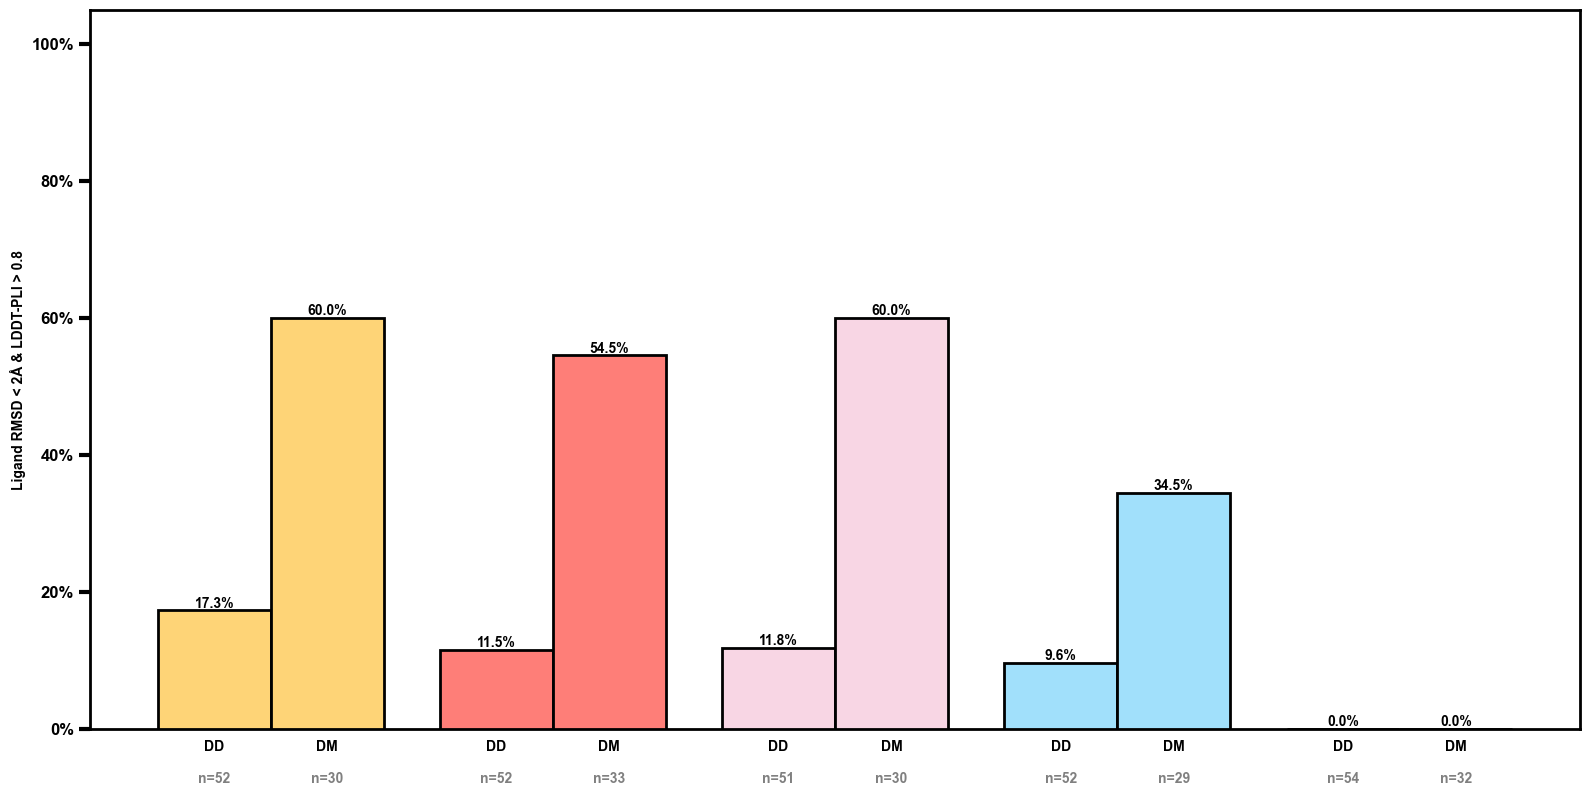

In [110]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Constants definition
METHODS = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
METHOD_NAMES = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
DOMAIN_GROUPS = ['domain-domain', 'domain-motif']

# Load base data
bsa_df = pd.read_excel(
    "/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx",
    usecols=["pdb_id", "domain_type"]
)
bsa_df['Domain_Group'] = bsa_df['domain_type'].str.replace('_', '-')

# Helper function for data loading
def load_and_merge_data(file_path):
    df = pd.read_csv(file_path)
    return pd.merge(df, bsa_df, on="pdb_id", how="inner")

# Load and process metrics data
df_lrmsd = load_and_merge_data("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
df_lddtpli = load_and_merge_data("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")

# Filter by release date
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()  # Remove whitespace
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()

# Apply release date filter
df_lrmsd = df_lrmsd[df_lrmsd['pdb_id'].isin(valid_pdb_ids)]
df_lddtpli = df_lddtpli[df_lddtpli['pdb_id'].isin(valid_pdb_ids)]

# Calculate pass rates
results = []
for method in METHODS:
    merged = pd.merge(
        df_lrmsd[["pdb_id", "Domain_Group", method]],
        df_lddtpli[["pdb_id", method]],
        on="pdb_id",
        suffixes=("_lrmsd", "_lddtpli")
    ).dropna(subset=[f"{method}_lrmsd", f"{method}_lddtpli"])
    
    # Calculate for each domain group
    for domain in DOMAIN_GROUPS:
        domain_data = merged[merged["Domain_Group"] == domain]
        total = len(domain_data)
        
        if total > 0:
            passed = domain_data[
                (domain_data[f"{method}_lrmsd"] < 2) &
                (domain_data[f"{method}_lddtpli"] > 0.8)
            ]
            pass_rate = len(passed) / total
        else:
            pass_rate = 0
            
        results.append({
            "Method": method,
            "Domain": domain,
            "PassRate": pass_rate,
            "Count": total
        })

# Create dataframe for plotting
rate_df = pd.DataFrame(results)

# Initialize plot
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Color settings
main_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
domain_palette = {
    'domain-domain': main_colors,
    'domain-motif': main_colors
}

# Plot configuration
bar_width = 0.6
method_spacing = 1.5
method_pos = np.arange(len(METHODS)) * method_spacing

# Plot bars for each domain group
for i, domain in enumerate(DOMAIN_GROUPS):
    data = rate_df[rate_df['Domain'] == domain]
    positions = method_pos + i*bar_width
    ax.bar(
        positions,
        data['PassRate'],
        width=bar_width,
        color=[domain_palette[domain][METHODS.index(m)] for m in data['Method']],
        edgecolor='black',
        linewidth=2,
        label=domain,
        zorder=3,
    )
    
    # Add value labels
    for pos, rate in zip(positions, data['PassRate']):
        ax.text(
            pos, rate ,
            f'{rate:.1%}',
            ha='center',
            va='bottom',
        )

# Add count annotations
for method_idx, method in enumerate(METHODS):
    dd_data = rate_df[(rate_df['Method'] == method) & (rate_df['Domain'] == 'domain-domain')]
    dm_data = rate_df[(rate_df['Method'] == method) & (rate_df['Domain'] == 'domain-motif')]
    
    base_x = method_pos[method_idx]
    label_y = -0.05
    
    ax.text(
        base_x + bar_width*0,
        label_y-0.01,
        f'n={dd_data["Count"].values[0]}',
        ha='center',
        rotation=0,
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )
    
    ax.text(
        base_x + bar_width*0,
        label_y+0.035,
        f'DD',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

        
    ax.text(
        base_x + bar_width*1,
        label_y+0.035,
        f'DM',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )
    
    ax.text(
        base_x + bar_width*1,
        label_y-0.01,
        f'n={dm_data["Count"].values[0]}',
        ha='center',
        rotation=0,
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )


# Final plot formatting
ax.set_xticks(method_pos + bar_width/2)
ax.set_xticklabels('')
plt.xlabel("", labelpad=60)
ax.set_ylabel("Ligand RMSD < 2Å & LDDT-PLI > 0.8")
plt.ylim(-0.0, 1.05)
plt.yticks(np.arange(0, 1.1, 0.2), labels=[f'{i:.0%}' for i in np.arange(0, 1.1, 0.2)])
ax.yaxis.set_tick_params(labelsize=12)

for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5) 
ax.tick_params(axis='y')
ax.tick_params(axis='y', which='major', width=3, length=8)
ax.tick_params(axis='x', which='major', width=0, length=0)

# Save figure
plt.tight_layout()


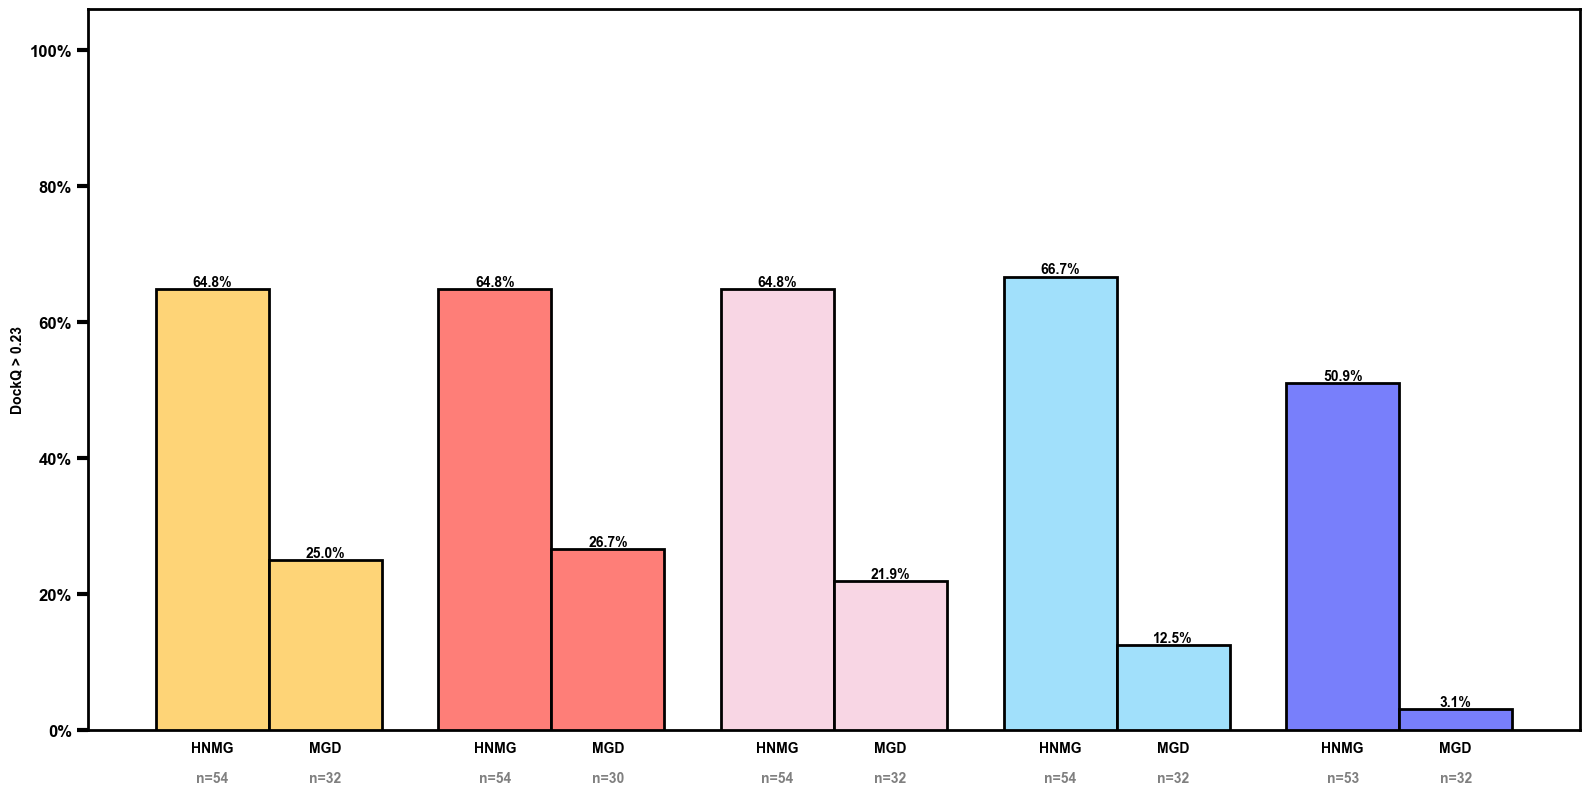

In [111]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define constants
METHODS = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
METHOD_NAMES = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
type_GROUPS = [ 'heterodimerization-nondegrader', 'heterodimerization-degrader']

# Load and prepare data
dockq_df = pd.read_csv("/data02/liaoyy/MG_ternary_benchmark/data/all_dockq_final.csv")

bsa_df = pd.read_excel(
    "/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx",
    usecols=["pdb_id", "type"]
)
bsa_df['type'] = bsa_df['type'].str.replace('_', '-')

# Merge dataframes
merged_df = pd.merge(dockq_df, bsa_df, on="pdb_id", how="inner")

# Filter by release date
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()  # Remove whitespace
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()

merged_df = merged_df[merged_df['pdb_id'].isin(valid_pdb_ids)]

# Reshape data for plotting
melt_df = merged_df.melt(
    id_vars=["pdb_id", "type"],
    value_vars=METHODS,
    var_name="Method",
    value_name="DockQ"
).dropna(subset=['DockQ'])

# Calculate pass rates
results = []
for method in METHODS:
    for type in type_GROUPS:
        subset = melt_df[(melt_df['Method'] == method) & (melt_df['type'] == type)]
        total = len(subset)
        passed = sum(subset['DockQ'] > 0.23)
        pass_rate = passed / total if total > 0 else 0
        results.append({
            'Method': method,
            'type': type,
            'PassRate': pass_rate,
            'Count': total
        })

rate_df = pd.DataFrame(results)

# Create plot
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Define colors and layout
main_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
type_palette = {
    'heterodimerization-nondegrader': main_colors,
    'heterodimerization-degrader' : main_colors
}

bar_width = 0.6
method_spacing = 1.5
method_pos = np.arange(len(METHODS)) * method_spacing

# Plot bars
for i, type in enumerate(type_GROUPS):
    data = rate_df[rate_df['type'] == type]
    positions = method_pos + i*bar_width
    ax.bar(
        positions,
        data['PassRate'],
        width=bar_width,
        color=[type_palette[type][METHODS.index(m)] for m in data['Method']],
        edgecolor='black',
        linewidth=2,
        label=type,
        zorder=3,
    )
    
    # Add value labels
    for pos, rate in zip(positions, data['PassRate']):
        ax.text(
            pos, rate ,
            f'{rate:.1%}',
            ha='center',
            va='bottom',
        )

# Add count labels
for method_idx, method in enumerate(METHODS):
    hn_data = rate_df[(rate_df['Method'] == method) & (rate_df['type'] == 'heterodimerization-nondegrader')]
    hd_data = rate_df[(rate_df['Method'] == method) & (rate_df['type'] == 'heterodimerization-degrader')]
    
    base_x = method_pos[method_idx]
    label_y = -0.04
    
    ax.text(
        base_x + bar_width*0,
        label_y-0.017,
        f'n={hn_data["Count"].values[0]}',
        rotation=0,
        ha='center',
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*0,
        label_y+0.025,
        f'HNMG',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*1,
        label_y+0.025,
        f'MGD',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*1,
        label_y-0.017,
        f'n={hd_data["Count"].values[0]}',
        rotation=0,
        ha='center',
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )

# Format axes and labels
ax.set_xticks(method_pos + bar_width/2)
ax.set_xticklabels('')
plt.xlabel("",labelpad=43)
ax.set_ylabel("DockQ > 0.23")
plt.ylim(-0.0, 1.06)
plt.yticks(np.arange(0, 1.1, 0.2), labels=[f'{i:.0%}' for i in np.arange(0, 1.1, 0.2)])
ax.yaxis.set_tick_params(labelsize=12)

for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5) 
ax.tick_params(axis='y')
ax.tick_params(axis='y', which='major', width=3, length=8)  
ax.tick_params(axis='x', which='major', width=0, length=0)  

# Save figure
plt.tight_layout()


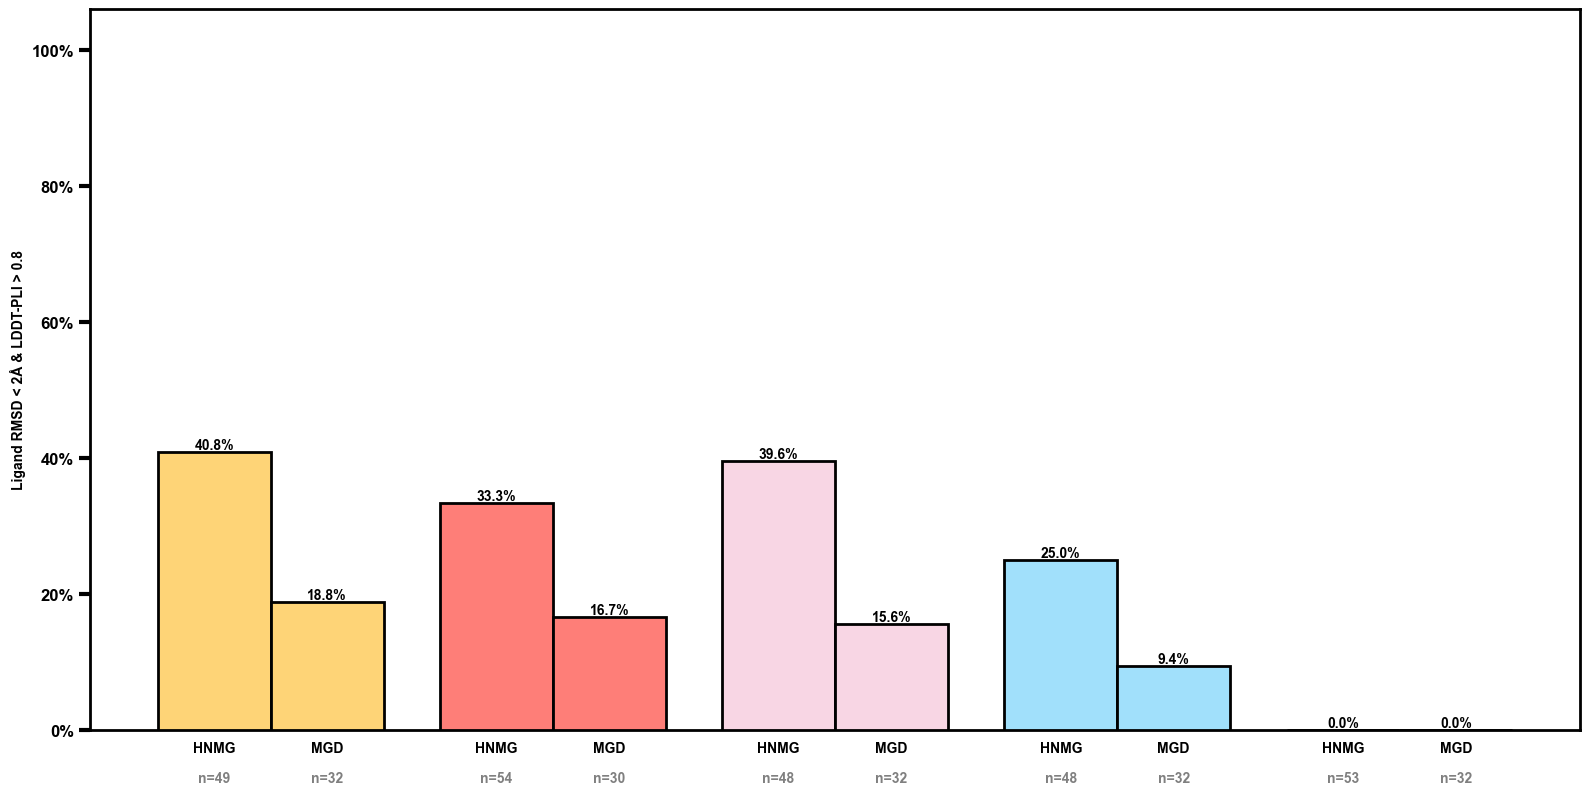

In [112]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Define constants
METHODS = ["af3", "boltz-1", "chai-1", "protenix", "RFAA"]
METHOD_NAMES = ["AF3", "Boltz-1", "Chai-1", "Protenix", "RFAA"]
typeS = ['heterodimerization-nondegrader', 'heterodimerization-degrader']

# Load base dataframe
bsa_df = pd.read_excel(
    "/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx",
    usecols=["pdb_id", "type"]
)
bsa_df['type'] = bsa_df['type'].str.replace('_', '-')

# Helper function to load and merge data
def load_and_merge_data(file_path):
    df = pd.read_csv(file_path)
    return pd.merge(df, bsa_df, on="pdb_id", how="inner")

# Load metrics data
df_lrmsd = load_and_merge_data("/data02/liaoyy/MG_ternary_benchmark/data/all_lrmsd_final.csv")
df_lddtpli = load_and_merge_data("/data02/liaoyy/MG_ternary_benchmark/data/all_lddtpli_final.csv")

# Filter by release date
release_df = pd.read_excel("/data02/liaoyy/MG_ternary_benchmark/MGBench.xlsx")
release_df['release_date'] = release_df['release_date'].str.strip()  # Remove whitespace
release_df['release_date'] = pd.to_datetime(release_df['release_date'])
filtered_release = release_df[release_df['release_date'] > '2021-09-30']
valid_pdb_ids = filtered_release['pdb_id'].str.upper().unique()

# Apply filtering
df_lrmsd = df_lrmsd[df_lrmsd['pdb_id'].isin(valid_pdb_ids)]
df_lddtpli = df_lddtpli[df_lddtpli['pdb_id'].isin(valid_pdb_ids)]

# Calculate pass rates
results = []
for method in METHODS:
    merged = pd.merge(
        df_lrmsd[["pdb_id", "type", method]],
        df_lddtpli[["pdb_id", method]],
        on="pdb_id",
        suffixes=("_lrmsd", "_lddtpli")
    ).dropna(subset=[f"{method}_lrmsd", f"{method}_lddtpli"])
    
    for type in typeS:
        type_data = merged[merged["type"] == type]
        total = len(type_data)
        
        # Count passing cases
        if total > 0:
            passed = type_data[
                (type_data[f"{method}_lrmsd"] < 2) &
                (type_data[f"{method}_lddtpli"] > 0.8)
            ]
            pass_rate = len(passed) / total
        else:
            pass_rate = 0
            
        results.append({
            "Method": method,
            "type": type,
            "PassRate": pass_rate,
            "Count": total
        })

rate_df = pd.DataFrame(results)

# Plot settings
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Color definitions
main_colors = ["#FED477", "#FE7E78", "#F8D6E4", "#A1E0FB", "#787FFB"]
type_palette = {
    'heterodimerization-nondegrader': main_colors,
    'heterodimerization-degrader' : main_colors
}

# Create bar plot
bar_width = 0.6
method_spacing = 1.5
method_pos = np.arange(len(METHODS)) * method_spacing

# Plot bars for each type
for i, type in enumerate(typeS):
    data = rate_df[rate_df['type'] == type]
    positions = method_pos + i*bar_width
    ax.bar(
        positions,
        data['PassRate'],
        width=bar_width,
        color=[type_palette[type][METHODS.index(m)] for m in data['Method']],
        edgecolor='black',
        linewidth=2,
        label=type,
        zorder=3,
    )
    
    # Add value labels
    for pos, rate in zip(positions, data['PassRate']):
        ax.text(
            pos, rate ,
            f'{rate:.1%}',
            ha='center',
            va='bottom',
        )

# Add count labels below bars
for method_idx, method in enumerate(METHODS):
    hn_data = rate_df[(rate_df['Method'] == method) & (rate_df['type'] == 'heterodimerization-nondegrader')]
    hd_data = rate_df[(rate_df['Method'] == method) & (rate_df['type'] == 'heterodimerization-degrader')]
    
    base_x = method_pos[method_idx]
    label_y = -0.04
    
    ax.text(
        base_x + bar_width*0,
        label_y-0.017,
        f'n={hn_data["Count"].values[0]}',
        rotation=0,
        ha='center',
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*0,
        label_y+0.025,
        f'HNMG',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*1,
        label_y+0.025,
        f'MGD',
        ha='center',
        rotation=0,
        va='top',
        color='black',
        transform=ax.get_xaxis_transform()
    )

    ax.text(
        base_x + bar_width*1,
        label_y-0.017,
        f'n={hd_data["Count"].values[0]}',
        rotation=0,
        ha='center',
        va='top',
        color='gray',
        transform=ax.get_xaxis_transform()
    )

# Format axes and labels
ax.set_xticks(method_pos + bar_width/2)
ax.set_xticklabels('')
plt.xlabel("", labelpad=43)
ax.set_ylabel("Ligand RMSD < 2Å & LDDT-PLI > 0.8")
plt.ylim(-0.0, 1.06)
plt.yticks(np.arange(0, 1.1, 0.2), labels=[f'{i:.0%}' for i in np.arange(0, 1.1, 0.2)])
ax.yaxis.set_tick_params(labelsize=12)

for spine in ax.spines.values():
    spine.set_linewidth(2.0)
ax.xaxis.set_tick_params(pad=5) 
ax.tick_params(axis='y')
ax.tick_params(axis='y', which='major', width=3, length=8)  
ax.tick_params(axis='x', which='major', width=0, length=0)  


# Save figure
plt.tight_layout()
